Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1366]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)
head(airbnb)

,ID,Listing.Url,Scrape.ID,Last.Scraped,Name,Summary,Space,Description,Experiences.Offered,Neighborhood.Overview,⋯,Review.Scores.Communication,Review.Scores.Location,Review.Scores.Value,License,Jurisdiction.Names,Cancellation.Policy,Calculated.host.listings.count,Reviews.per.Month,Geolocation,Features
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,14712301,https://www.airbnb.com/rooms/14712301,2.017030e+13,2017-03-04,Cozy Studio between Earls Court and Gloucester Rd,"Located 1 minute away from Earls Court. It is a commercial street full of restaurants, supermarkets, the tube station, gym, hotels and everything you might need. It is a cozy studio, in a perfect location and good price even if it is located in one of the most expensive areas of London (Kensington and Chelsea Borough). It has a double bed a big desk an induction kitchen and a shower. There are cupboards to store all your needs.",,"Located 1 minute away from Earls Court. It is a commercial street full of restaurants, supermarkets, the tube station, gym, hotels and everything you might need. It is a cozy studio, in a perfect location and good price even if it is located in one of the most expensive areas of London (Kensington and Chelsea Borough). It has a double bed a big desk an induction kitchen and a shower. There are cupboards to store all your needs.",none,,⋯,9,9,10,,,strict,1,0.34,"51.492474020220754,-0.18862840099442768","Host Has Profile Pic,Host Identity Verified"
2,12884849,https://www.airbnb.com/rooms/12884849,2.017030e+13,2017-03-05,Five bedroom house in Barnes,"Lovely and spacious Edwardian house located on beautiful street in Barnes, between the village (10 minutes walk) and Hammersmith station (15 minutes walk / 5 minutes by bus). Can accommodate up to 8 adults and 2 young children.","The house is spacious with approx 225 sq. of living space. The ground floor has a TV / living room, where the sofa can be used as a single bed if required. There is also a separate dining / reception area adjacent to the kitchen, as well as a conservatory with a smaller dining table and plenty of toys (which will be removed if you come without kids!). Both the kitchen and the conservatory have direct access on to the garden. On the first floor, the master bedroom is located, as well as two smaller bedrooms and a spacious bathroom. The childrens' bedrooms have a crib and a cot bed respectively, however we can prepare one of them with a king size sofa bed if requested, to accommodate older children or additional adults. On the top floor, there are two additional and spacious bedrooms as well as shared bathroom. All bedrooms including the children's bedrooms have plenty of wardrobe space. House is basic but clean and fully functional.","Lovely and spacious Edwardian house located on beautiful street in Barnes, between the village (10 minutes walk) and Hammersmith station (15 minutes walk / 5 minutes by bus). Can accommodate up to 8 adults and 2 young children. The house is spacious with approx 225 sq. of living space. The ground floor has a TV / living room, where the sofa can be used as a single bed if required. There is also a separate dining / reception area adjacent to the kitchen, as well as a conservatory with a smaller dining table and plenty of toys (which will be removed if you come without kids!). Both the kitchen and the conservatory have direct access on to the garden. On the first floor, the master bedroom is located, as well as two smaller bedrooms and a spacious bathroom. The childrens' bedrooms have a crib and a cot bed respectively, however we can prepare one of them with a king size sofa bed if requested, to accommodate older children or additional adults. On the top floor, there are two additional",none,Quiet residential street,⋯,10,10,9,,,moderate,2,0.76,"51.482004616612734,-0.23927746504041247","Host Has Profile Pic,Is Location Exact"
3,17524980,https://www.airbnb.com/rooms/17

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [1367]:
data_airbnb<-airbnb[c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]
head(data_airbnb)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,London,Entire home/apt,,1,1.0,1,1,50,NA,1,20,90,51.49247,-0.1886284
2,London,Entire home/apt,LB of Richmond upon Thames,8,2.5,5,5,175,NA,6,25,87,51.48200,-0.2392775
3,London,Entire home/apt,,2,1.0,1,1,155,NA,1,0,NA,51.51579,-0.1363321
4,Madrid,Private room,Palacio,2,1.0,1,1,36,NA,1,0,98,40.41011,-3.7147540
5,Madrid,Entire home/apt,Palacio,2,1.0,1,1,85,NA,1,0,95,40.41697,-3.7094389
6,Madrid,Private room,La Latina,2,1.0,1,1,20,861,1,10,91,40.40971,-3.7135612


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [1368]:
library(dplyr)

data_airbnb %>%
    filter(City=="Madrid") %>%
    filter(Room.Type=="Entire home/apt") %>%
    filter(Neighbourhood!="") -> data_airbnb

#data_airbnb

df_madrid <- data_airbnb[c('Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439
2,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249
3,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843
4,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691
5,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322
6,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099


Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [1369]:
df_madrid %>%
    mutate(Square.Meters=Square.Feet*0.092903) -> df_madrid
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439,NA
2,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249,NA
3,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843,NA
4,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691,NA
5,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322,NA
6,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099,NA


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [1370]:
na_sq_meters <- table(is.na(df_madrid$Square.Meters))
na_sq_meters


FALSE  TRUE 
  347  5254 

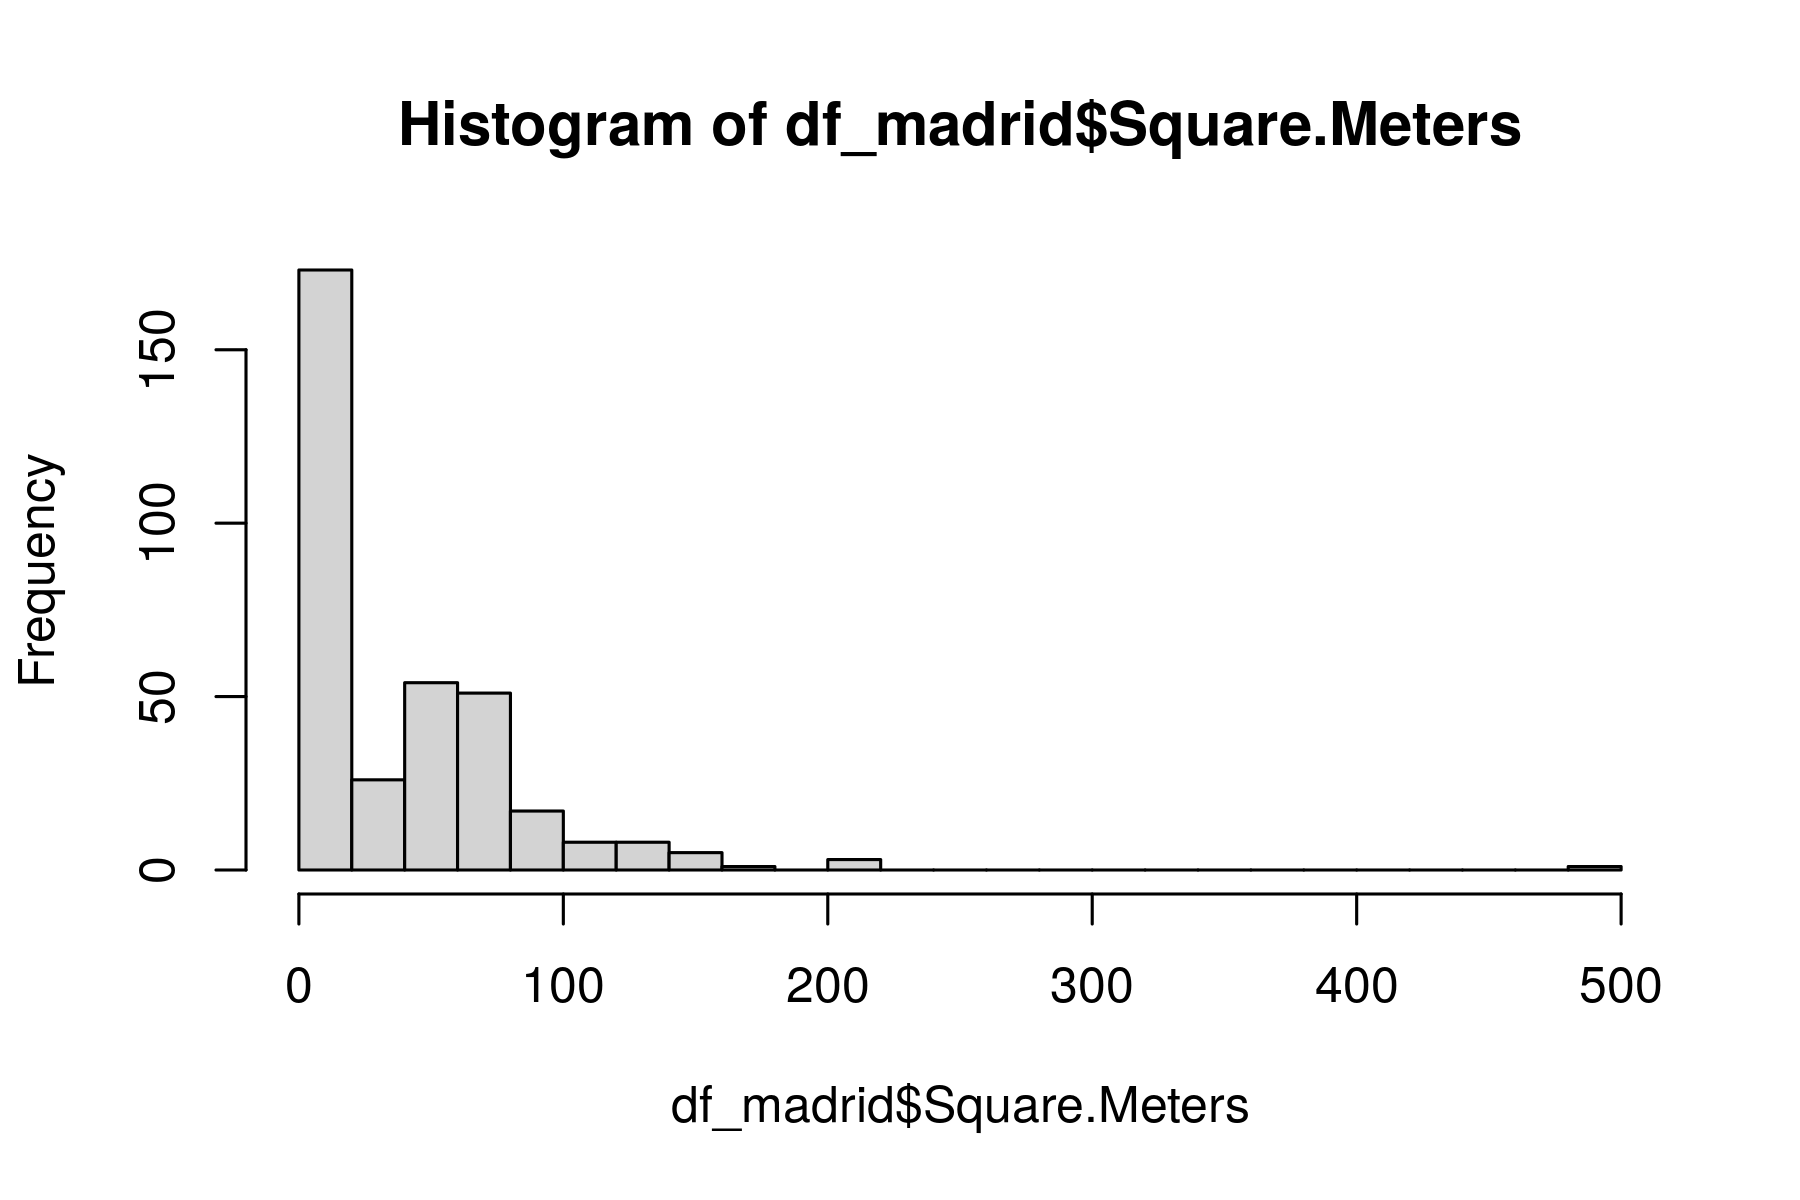

In [1371]:
hist(df_madrid$Square.Meters, breaks = 20)

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [1372]:
df_madrid %>% 
    filter(!is.na(Square.Meters)) -> porcentaje_cerom_madrid

porcentaje_cerom_madrid %>%
    summarise(cero_sm=sum(porcentaje_cerom_madrid$Square.Meters==0)/n()*100)
    

cero_sm
<dbl>
36.88761


Reemplazar todos los 0m^2 por NA 

In [1373]:
df_madrid$Square.Meters[df_madrid$Square.Meters==0] <- NA

df_madrid

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Palacio,2,1.0,1,1,85,NA,1,0,95,40.41697,-3.709439,NA
Malasaña,4,1.0,1,2,112,NA,2,5,99,40.42319,-3.711249,NA
Palacio,8,3.0,3,4,190,NA,6,40,96,40.41651,-3.717843,NA
La Latina,2,1.0,1,1,71,NA,1,0,90,40.41200,-3.706691,NA
Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322,NA
Embajadores,3,1.0,0,2,60,NA,1,0,100,40.41085,-3.701099,NA
La Latina,2,1.0,0,1,45,NA,1,0,87,40.40812,-3.710367,NA
Embajadores,6,1.0,2,3,120,NA,6,30,100,40.41314,-3.705092,NA
Embajadores,4,1.0,0,2,50,NA,2,8,86,40.40988,-3.702840,NA


In [1374]:
table(df_madrid$Square.Meters[df_madrid$Square.Meters==0])

< table of extent 0 >

In [1375]:
#Porcentaje de entradas con valor NA en el data frame
df_madrid %>%
    summarise(cero_sm=sum(is.na(df_madrid$Square.Meters))/n()*100)

cero_sm
<dbl>
96.08998


Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

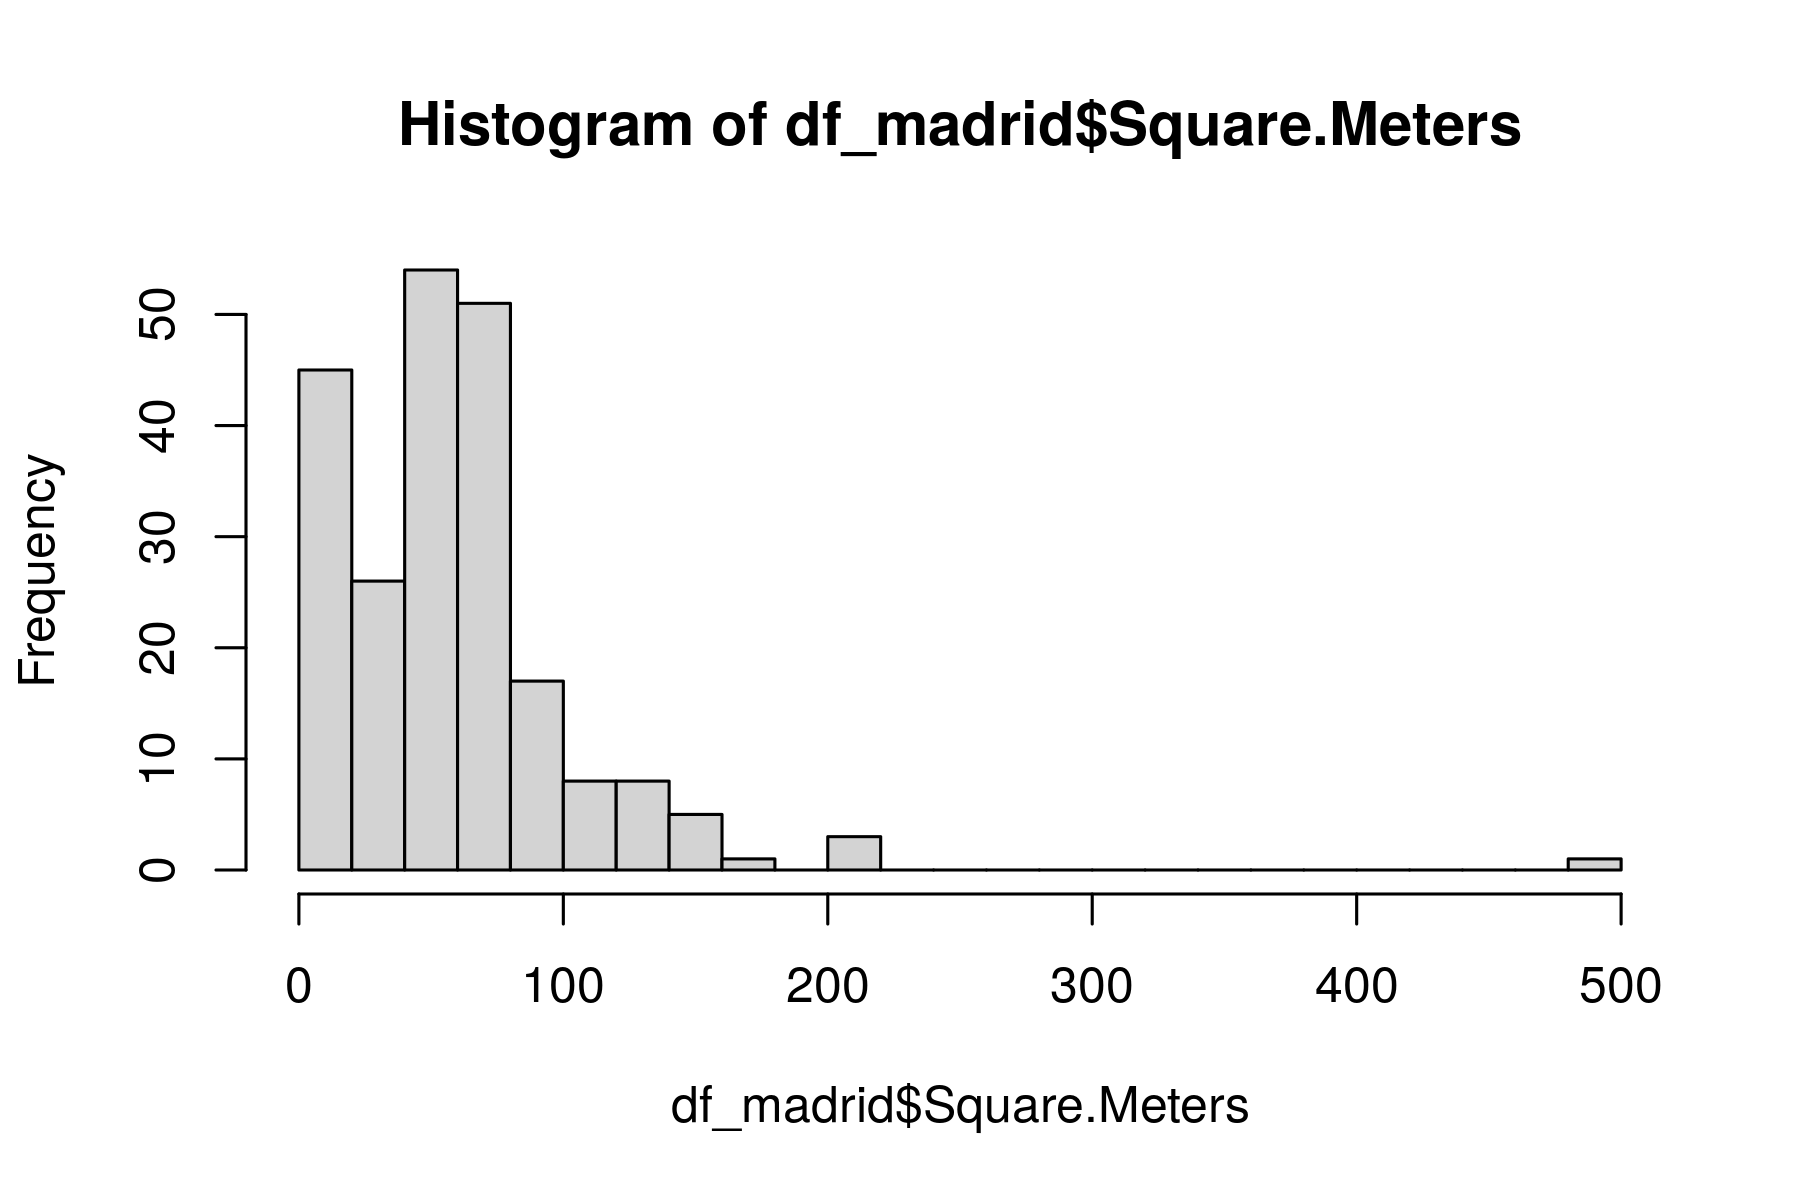

In [1376]:
hist(df_madrid$Square.Meters, breaks = 20)

In [1377]:
?hist

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439,NA
2,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249,NA
3,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843,NA
4,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691,NA
5,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322,NA
6,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099,NA


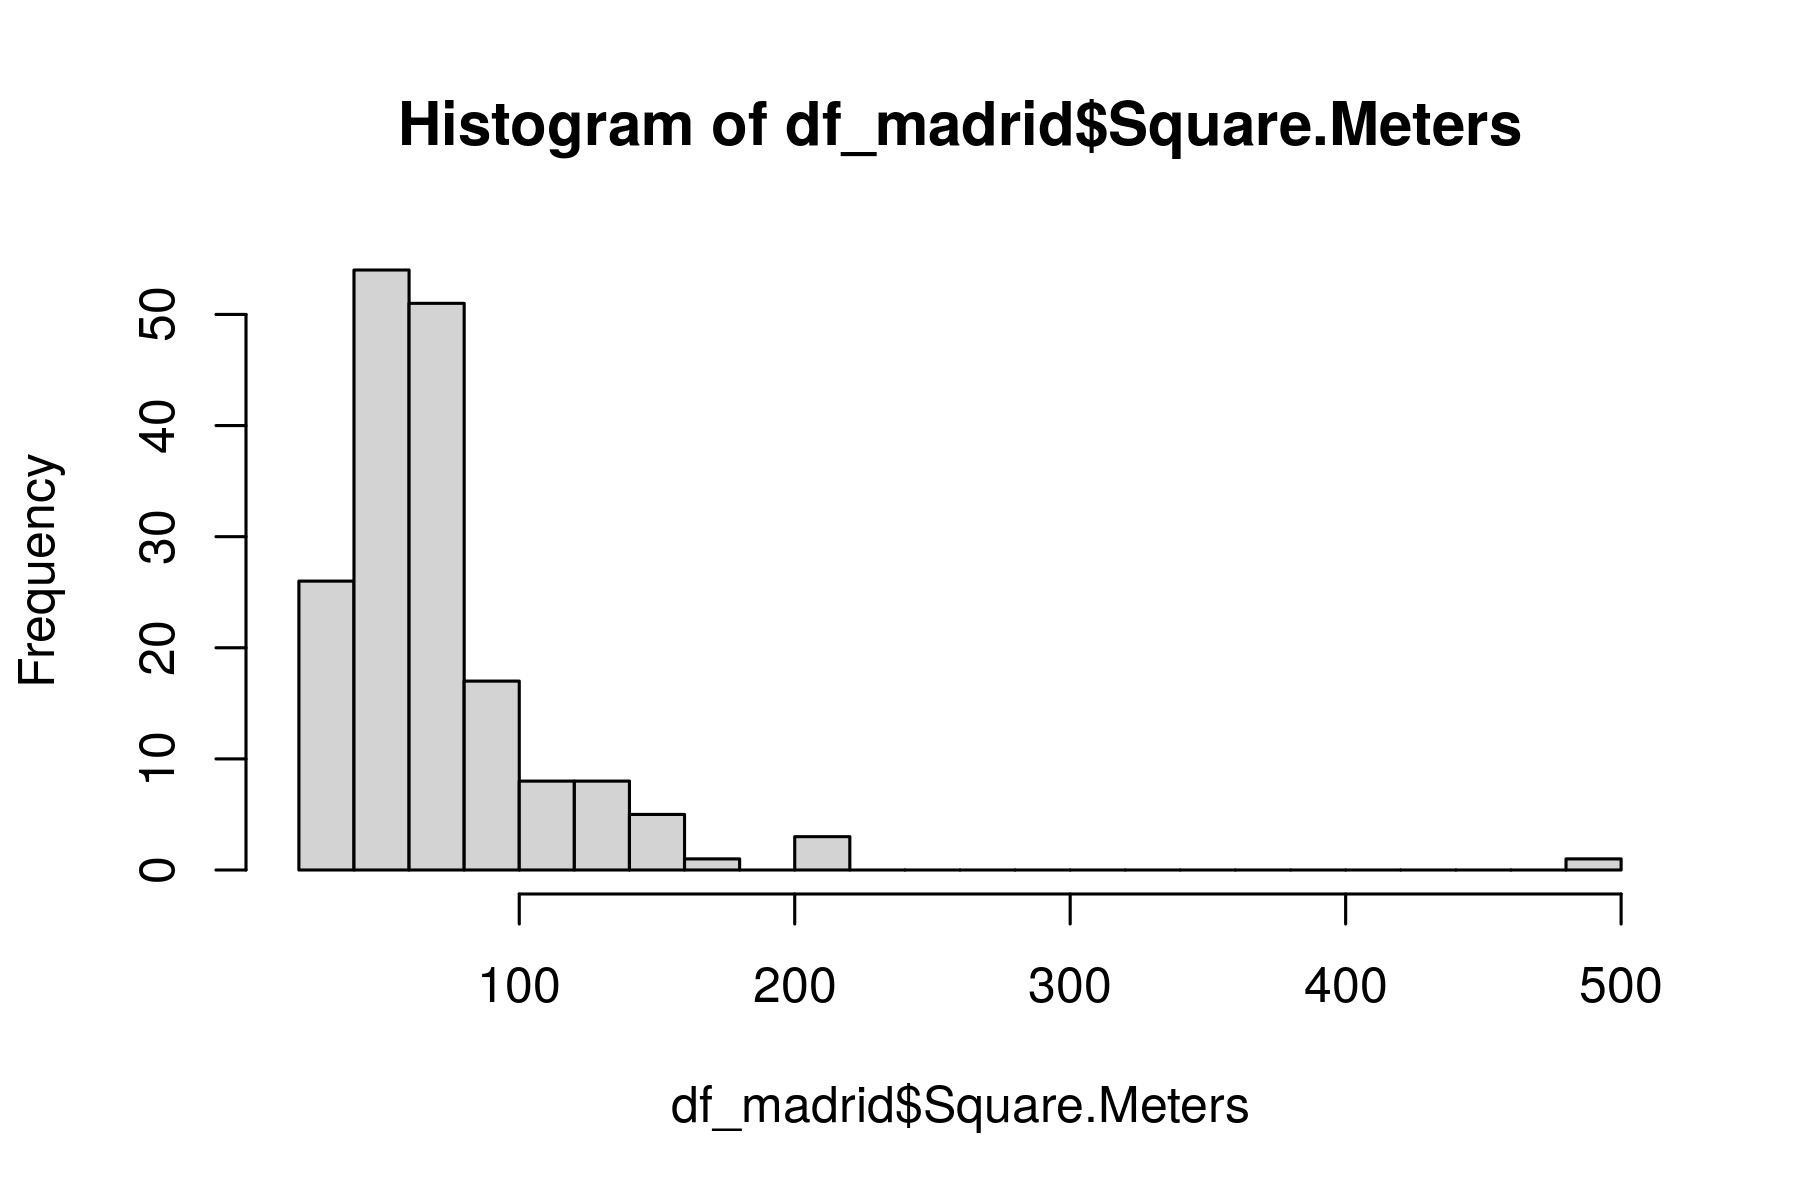

In [1378]:
df_madrid$Square.Meters[df_madrid$Square.Meters<20] <- NA

head(df_madrid)

hist(df_madrid$Square.Meters, breaks = 20)

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [1379]:
summary(df_madrid)

 Neighbourhood       Accommodates      Bathrooms        Bedrooms     
 Length:5601        Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Class :character   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 Mode  :character   Median : 4.000   Median :1.000   Median : 1.000  
                    Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
                    3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
                    Max.   :16.000   Max.   :6.500   Max.   :10.000  
                                     NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 237.0   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 392.6   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

In [1380]:
distinct(df_madrid[c('Neighbourhood')])

Neighbourhood
<chr>
Palacio
Malasaña
La Latina
Embajadores
Cortes
Justicia
Sol
Ciudad Lineal
Hortaleza


In [1381]:
table(df_madrid$Neighbourhood)


            Acacias             Adelfas             Almagro            Almenara 
                 33                  26                  75                  20 
             Aluche            Arapiles          Arganzuela           Argüelles 
                 81                  66                   2                 118 
             Atocha             Barajas       Bellas Vistas          Berruguete 
                  5                  11                  27                  23 
        Carabanchel          Castellana            Castilla         Castillejos 
                 76                  51                  17                  35 
             Centro            Chamberí       Ciudad Jardin       Ciudad Lineal 
                 13                  14                  18                  76 
             Cortes      Cuatro Caminos            Delicias      El Tréntaiseis 
                441                  45                  25                  10 
            El Viso        

In [1382]:
df_madrid %>%
    filter(!is.na(Square.Meters)) -> df_Neighbohoods_no_na
df_Neighbohoods_no_na

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Sol,5,1.0,2,5,100,753,2,5,91,40.41609,-3.706012,69.95596
Cuatro Caminos,9,2.0,3,8,100,1184,4,10,90,40.45241,-3.699048,109.99715
Cuatro Caminos,4,2.0,1,1,46,603,2,7,93,40.45021,-3.699102,56.02051
Pacifico,4,1.0,2,3,77,1184,2,15,95,40.40392,-3.681469,109.99715
Carabanchel,6,1.0,3,4,85,1076,2,0,88,40.37987,-3.732151,99.96363
La Latina,4,1.0,2,2,115,700,2,0,89,40.41291,-3.706860,65.03210
Malasaña,5,1.0,1,1,75,538,1,0,90,40.42721,-3.708675,49.98181
Malasaña,2,1.0,1,1,90,700,1,0,98,40.42918,-3.708982,65.03210
La Latina,4,1.0,2,3,85,409,3,10,94,40.40818,-3.708963,37.99733


In [1383]:
table(df_Neighbohoods_no_na$Neighbourhood)


         Acacias          Adelfas          Almagro         Almenara 
               3                1                1                5 
        Arapiles        Argüelles          Barajas      Carabanchel 
               2                3                1                3 
      Castellana         Castilla           Centro         Chamberí 
               3                3                1                1 
   Ciudad Jardin    Ciudad Lineal           Cortes   Cuatro Caminos 
               1                2                9                2 
  El Tréntaiseis          El Viso      Embajadores Fuente del Berro 
               1                1               20                1 
            Goya        Jerónimos         Justicia        La Latina 
               2                2                8               20 
           Lista         Malasaña        Moratalaz         Pacifico 
               2               26                1                2 
         Palacio  Palos do Moguer

In [1384]:
df_madrid %>%
    filter(Neighbourhood %in% df_Neighbohoods_no_na$Neighbourhood) ->df_madrid

head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439,NA
2,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249,NA
3,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843,NA
4,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691,NA
5,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322,NA
6,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099,NA


In [1385]:
#Forma larga - prueba
#df_madrid %>%
#    filter(Neighbourhood=='Acacias'|Neighbourhood=='Adelfas'|Neighbourhood=='Almagro'|Neighbourhood=='Almenara'|Neighbourhood=='Arapiles'|Neighbourhood=='Argüelles'|Neighbourhood=='Barajas'|Neighbourhood=='Carabanchel'|Neighbourhood=='Castellana'|Neighbourhood=='Castilla'|Neighbourhood=='Centro'|Neighbourhood=='Chamberí'|Neighbourhood=='Ciudad Jardin'|Neighbourhood=='Ciudad Lineal'|Neighbourhood=='Cortes'|Neighbourhood=='Cuatro Caminos'|Neighbourhood=='El Tréntaiseis'|Neighbourhood=='El Viso'|Neighbourhood=='Embajadores'|Neighbourhood=='Fuente del Berro'|Neighbourhood=='Goya'|Neighbourhood=='Jerónimos'|Neighbourhood=='Justicia'|Neighbourhood=='La Latina'|Neighbourhood=='Lista'|Neighbourhood=='Malasaña'|Neighbourhood=='Moratalaz'|Neighbourhood=='Pacifico'|Neighbourhood=='Palacio'|Neighbourhood=='Palos do Moguer'|Neighbourhood=='Recoletos'|Neighbourhood=='Retiro'|Neighbourhood=='Rios Rosas'|Neighbourhood=='San Blas'|Neighbourhood=='Sol'|Neighbourhood=='Trafalgar'|Neighbourhood=='Usera'|Neighbourhood=='Vicálvaro') -> df_madrid

#df_madrid
        

In [1386]:
table(df_madrid$Neighbourhood)


         Acacias          Adelfas          Almagro         Almenara 
              33               26               75               20 
        Arapiles        Argüelles          Barajas      Carabanchel 
              66              118               11               76 
      Castellana         Castilla           Centro         Chamberí 
              51               17               13               14 
   Ciudad Jardin    Ciudad Lineal           Cortes   Cuatro Caminos 
              18               76              441               45 
  El Tréntaiseis          El Viso      Embajadores Fuente del Berro 
              10               18              585               33 
            Goya        Jerónimos         Justicia        La Latina 
             108               33              384              571 
           Lista         Malasaña        Moratalaz         Pacifico 
              47              679               15               44 
         Palacio  Palos do Moguer

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

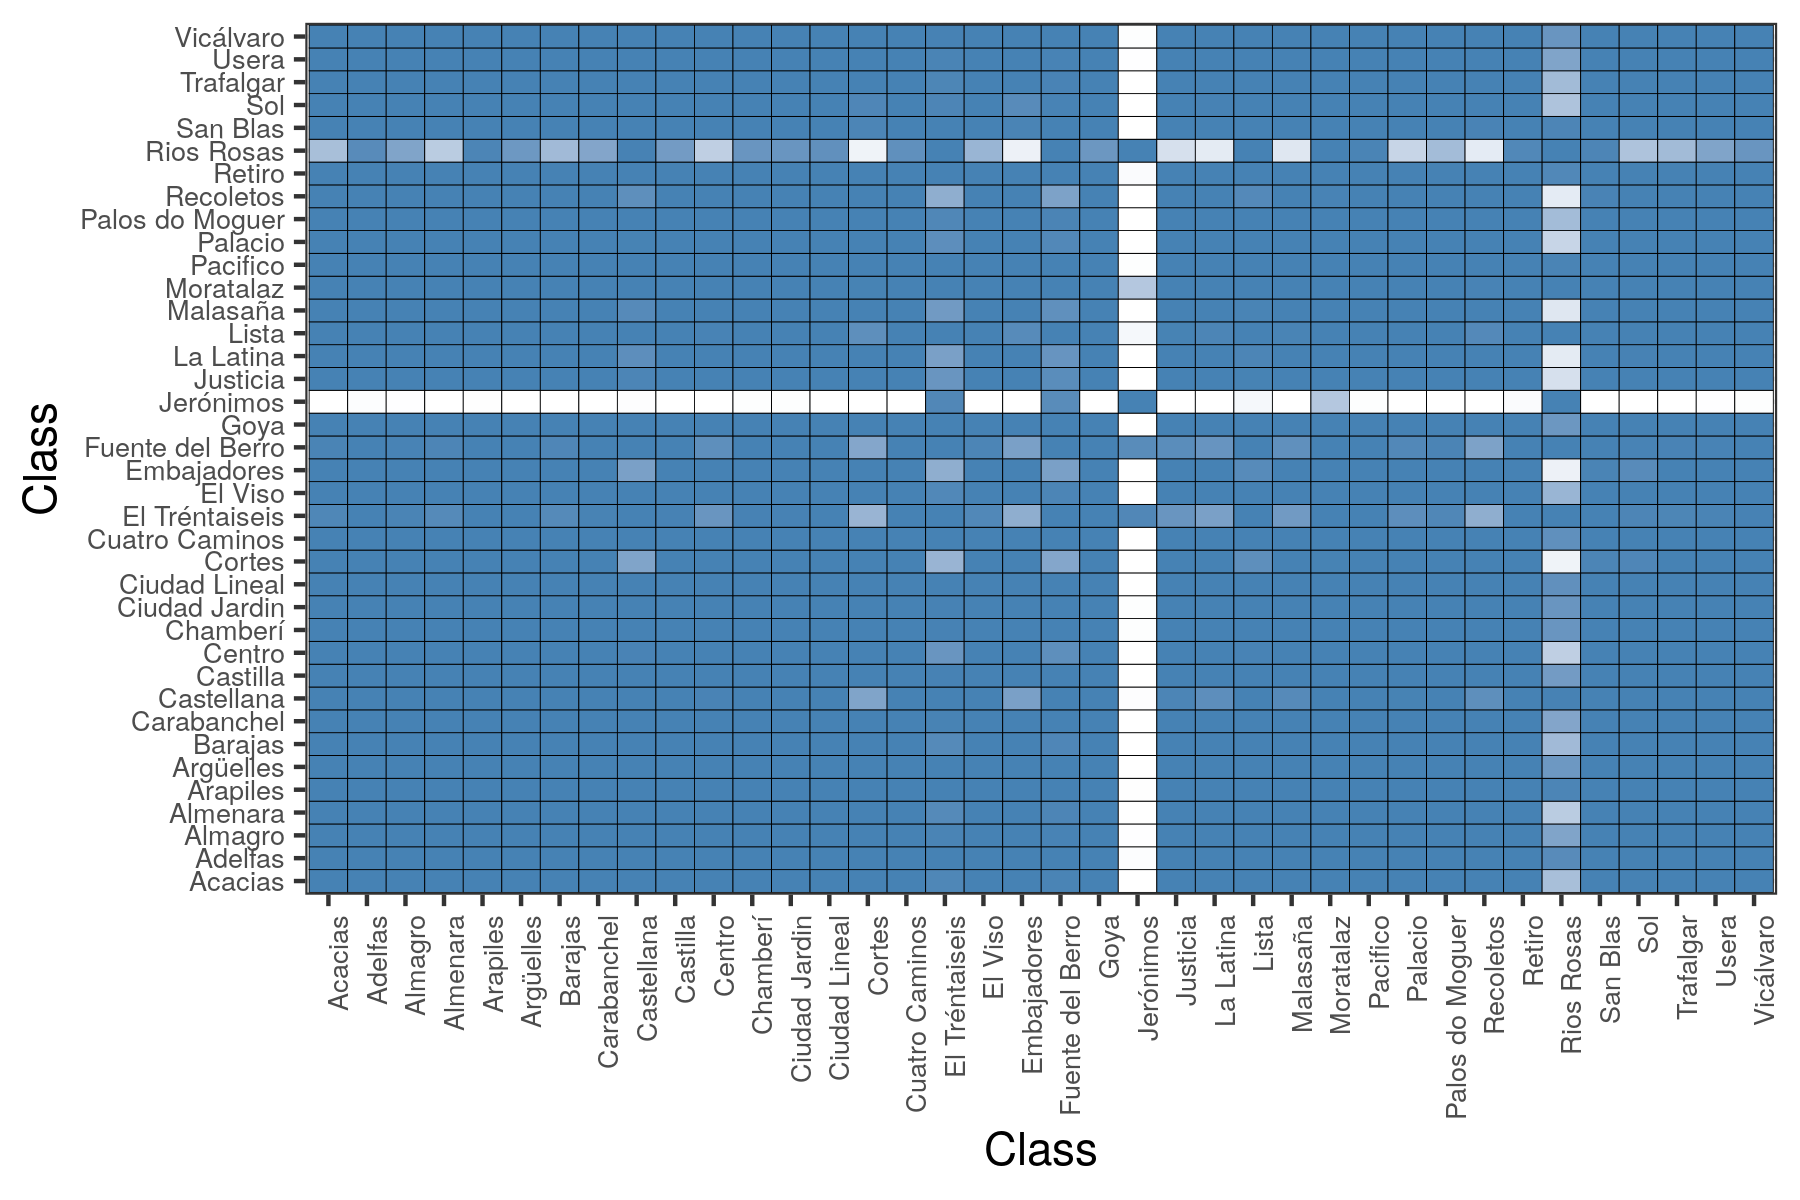

In [1387]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
#tky.result
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1

library(ggplot2)
library(reshape2)

dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue",name = "Tamaño")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, size = 6.5, hjust=1),axis.text.y = element_text(size = 6.5),legend.position="none")

In [1388]:
resm 

,Acacias,Adelfas,Almagro,Almenara,Arapiles,Argüelles,Barajas,Carabanchel,Castellana,Castilla,⋯,Palacio,Palos do Moguer,Recoletos,Retiro,Rios Rosas,San Blas,Sol,Trafalgar,Usera,Vicálvaro
Acacias,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9998,1.0000,⋯,1.0000,1.0000,1.0000,1.0000,0.4982,1.0000,1.0000,1.0000,1.0000,1.0000
Adelfas,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,⋯,1.0000,1.0000,1.0000,1.0000,0.9216,1.0000,1.0000,1.0000,1.0000,1.0000
Almagro,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,⋯,1.0000,1.0000,1.0000,1.0000,0.7171,1.0000,1.0000,1.0000,1.0000,1.0000
Almenara,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9988,1.0000,⋯,1.0000,1.0000,1.0000,1.0000,0.3925,1.0000,1.0000,1.0000,1.0000,1.0000
Arapiles,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,⋯,1.0000,1.0000,0.9993,1.0000,0.9752,1.0000,1.0000,1.0000,1.0000,1.0000
Argüelles,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,⋯,1.0000,1.0000,1.0000,1.0000,0.8146,1.0000,1.0000,1.0000,1.0000,1.0000
Barajas,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9989,1.0000,⋯,1.0000,1.0000,1.0000,1.0000,0.5322,1.0000,1.0000,1.0000,1.0000,1.0000
Carabanchel,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,⋯,1.0000,1.0000,1.0000,1.0000,0.7028,1.0000,1.0000,1.0000,1.0000,1.0000
Castellana,0.9998,1.0000,1.0000,0.9988,1.0000,1.0000,0.9989,1.0000,1.0000,1.0000,⋯,0.9948,0.9997,0.8904,1.0000,0.9975,1.0000,0.9999,0.9999,1.0000,1.0000
Castilla,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,⋯,1.0000,1.0000,1.0000,1.0000,0.7867,1.0000,1.0000,1.0000,1.0000,1.0000


Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


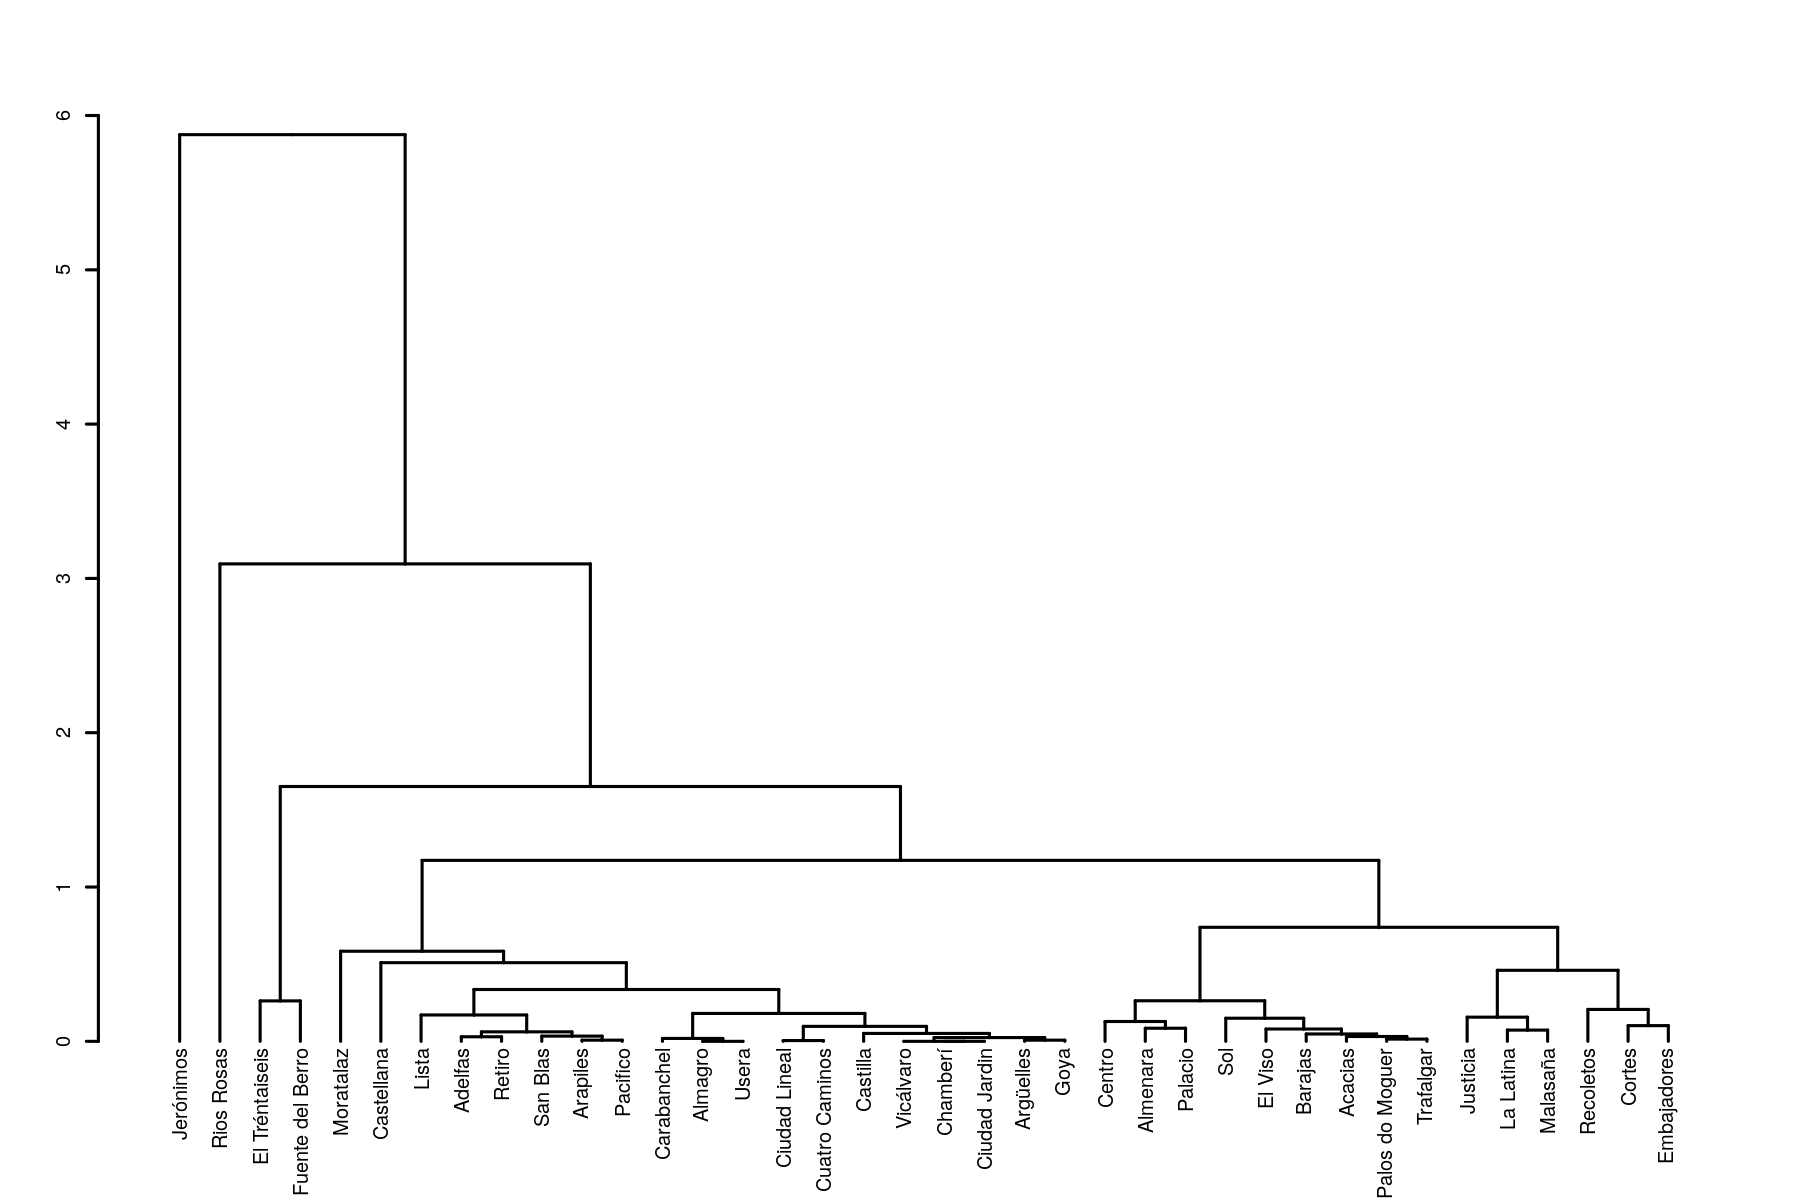

In [1389]:
d <- dist(as.matrix(1-resm), method="euclidean")
#d <- as.dist(1-resm)
hc <- hclust(d, method="complete")
hcd <- as.dendrogram(hc)
par(cex=0.4)
plot(hcd)

In [1390]:
hc


Call:
hclust(d = d, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 38 


In [1391]:
labels(hc)

[1] "Jerónimos"        "Rios Rosas"       "El Tréntaiseis"   "Fuente del Berro"
 [5] "Moratalaz"        "Castellana"       "Lista"            "Adelfas"         
 [9] "Retiro"           "San Blas"         "Arapiles"         "Pacifico"        
[13] "Carabanchel"      "Almagro"          "Usera"            "Ciudad Lineal"   
[17] "Cuatro Caminos"   "Castilla"         "Vicálvaro"        "Chamberí"        
[21] "Ciudad Jardin"    "Argüelles"        "Goya"             "Centro"          
[25] "Almenara"         "Palacio"          "Sol"              "El Viso"         
[29] "Barajas"          "Acacias"          "Palos do Moguer"  "Trafalgar"       
[33] "Justicia"         "La Latina"        "Malasaña"         "Recoletos"       
[37] "Cortes"           "Embajadores"

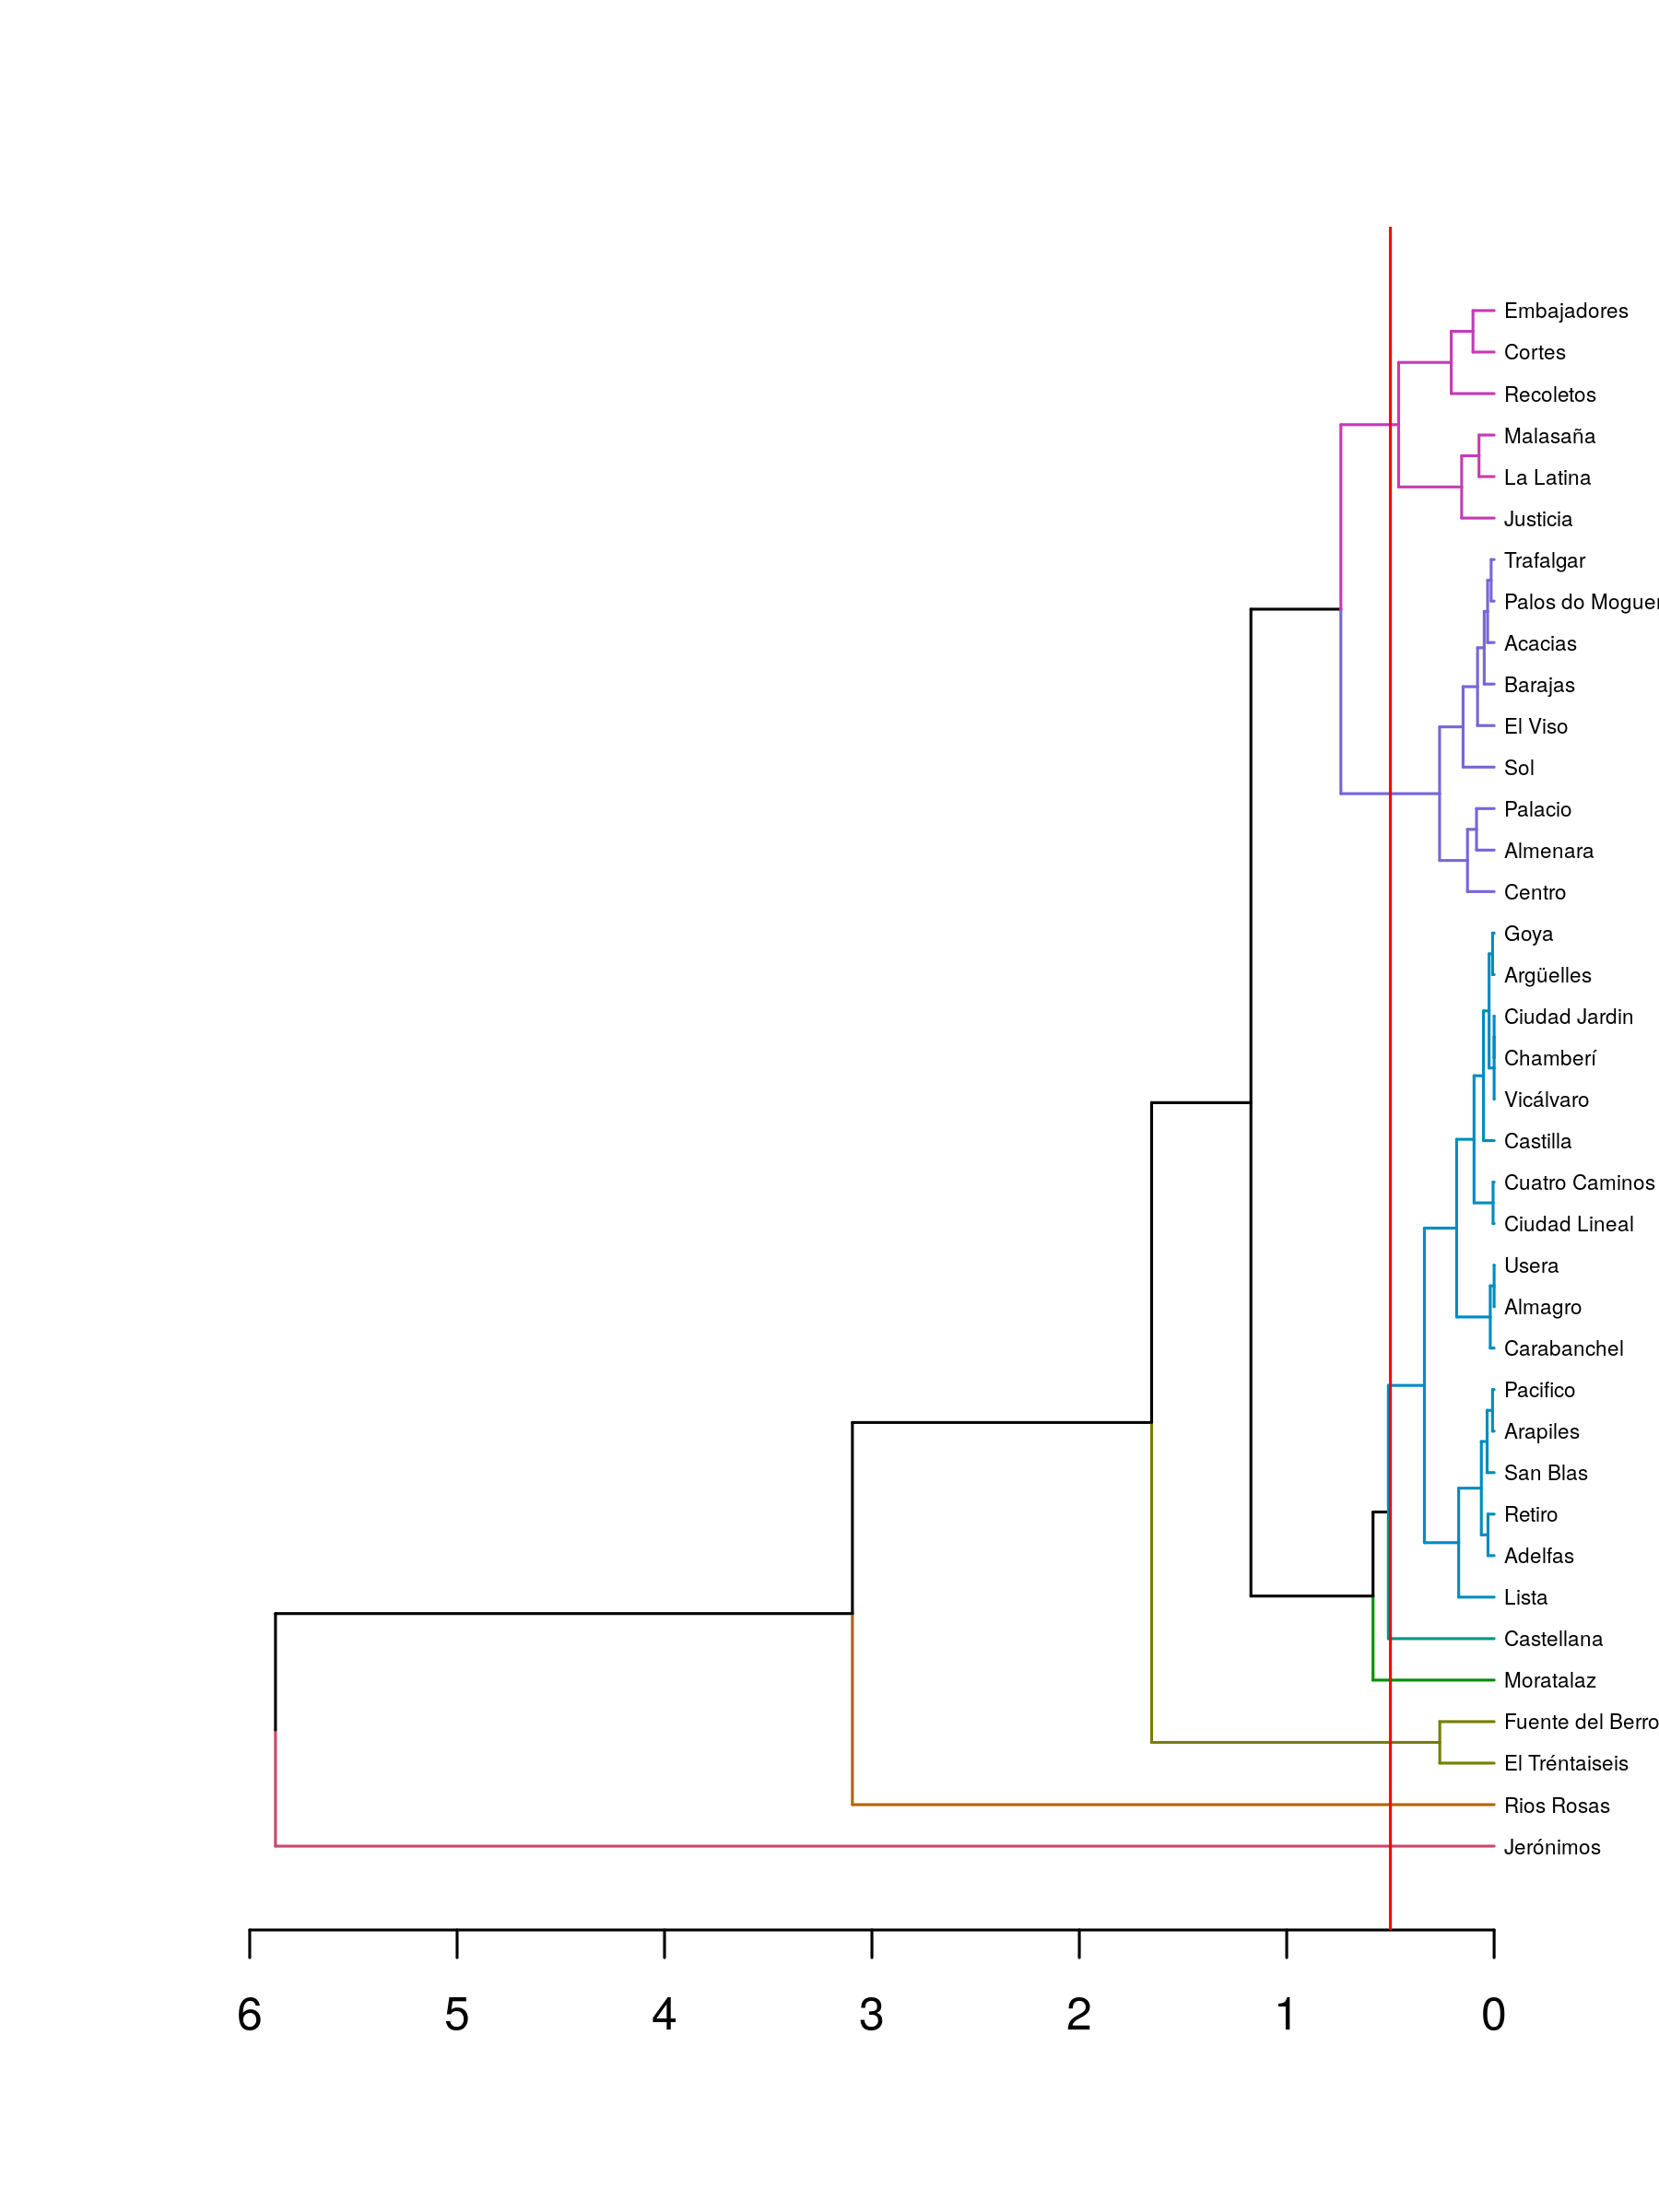

In [1392]:
library(dendextend)
options(repr.plot.height=8,repr.plot.width=6,repr.plot.res = 300)
#labels(hc)
hcd<-set(hcd,"labels_cex", 0.45) 
plot(color_branches(hcd,h=0.5),horiz=TRUE,cex=1)
abline(v=0.5,col="red")
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

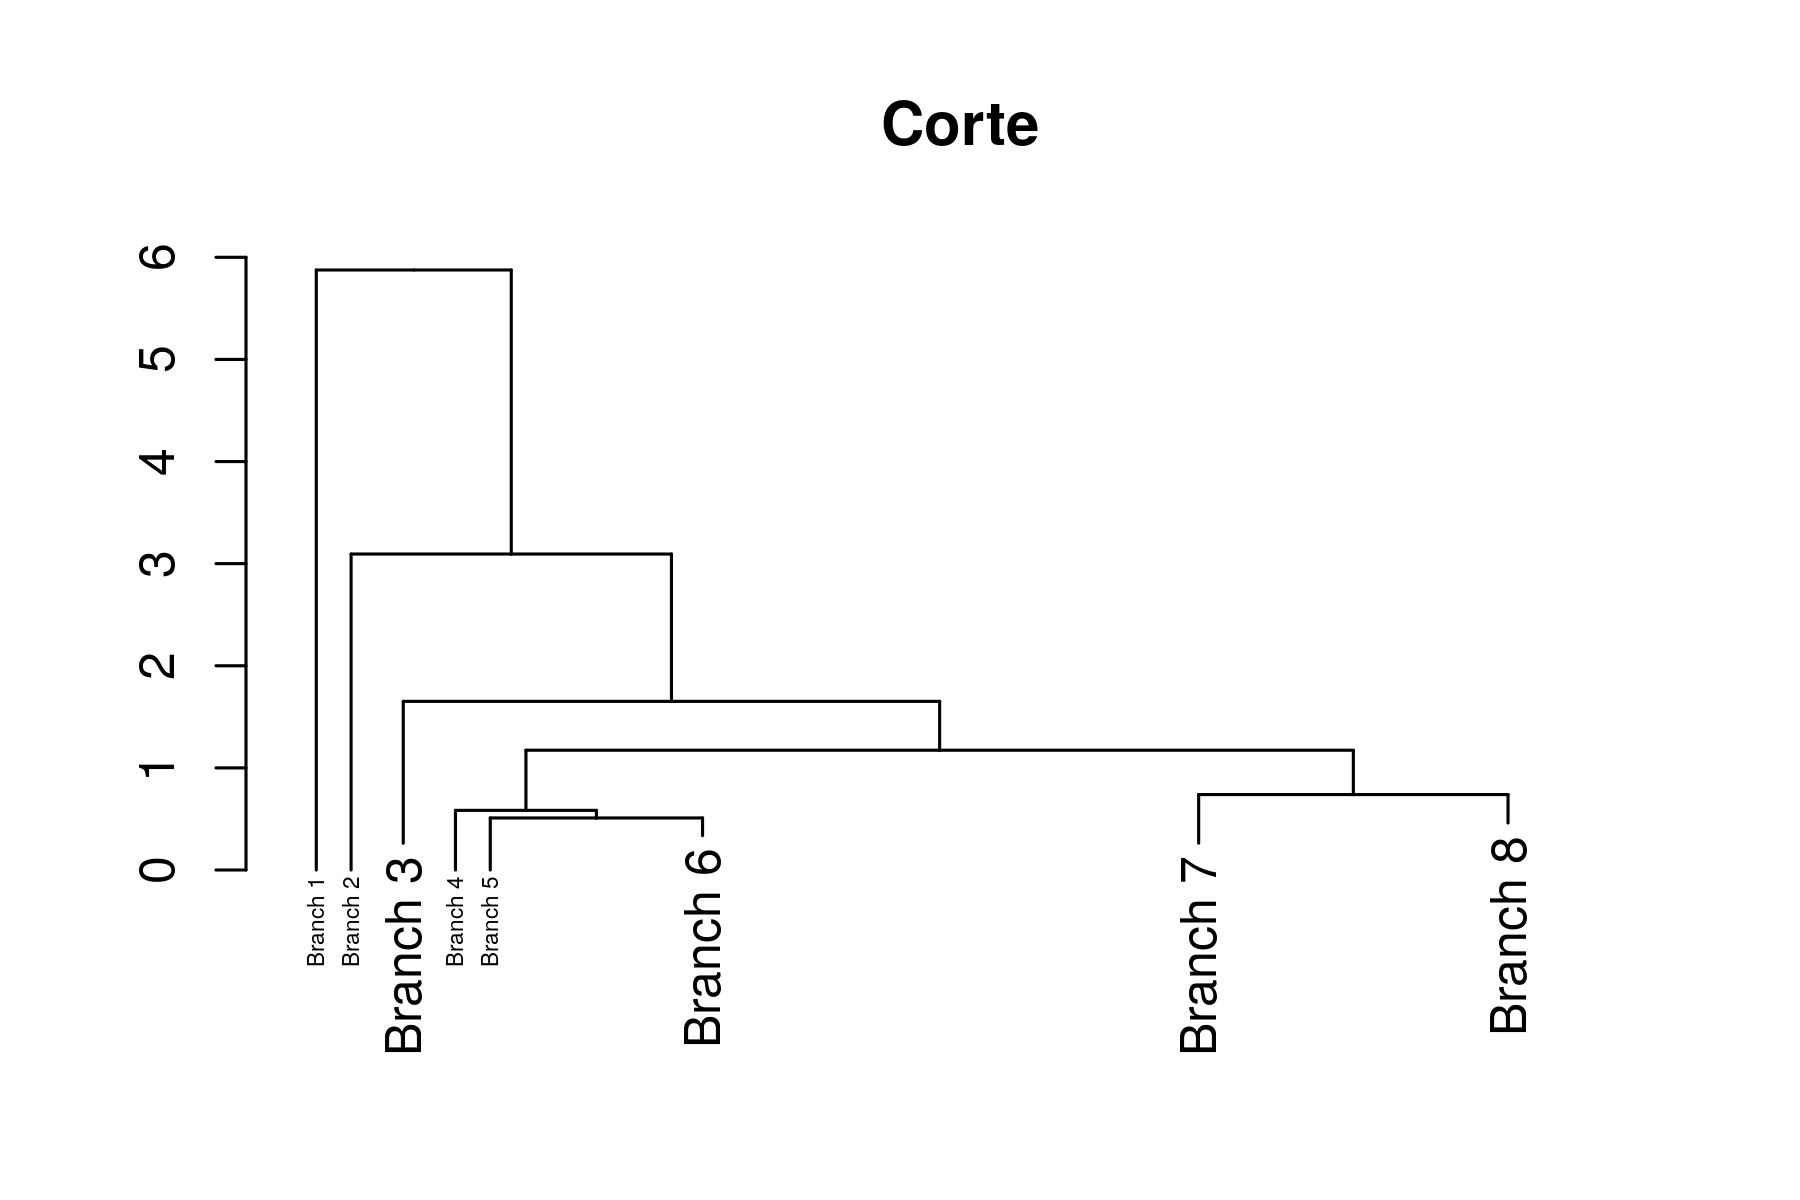

In [1393]:
plot(cut(hcd, h = 0.5)$upper, main = "Corte", cex=1)

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [1394]:
#table(df_madrid$Neigbourhood,cutree(hcd,h=0.5))
cutree(hcd,h=0.5)

Acacias          Adelfas          Almagro         Almenara 
               1                2                2                1 
        Arapiles        Argüelles          Barajas      Carabanchel 
               2                2                1                2 
      Castellana         Castilla           Centro         Chamberí 
               3                2                1                2 
   Ciudad Jardin    Ciudad Lineal           Cortes   Cuatro Caminos 
               2                2                4                2 
  El Tréntaiseis          El Viso      Embajadores Fuente del Berro 
               5                1                4                5 
            Goya        Jerónimos         Justicia        La Latina 
               2                6                4                4 
           Lista         Malasaña        Moratalaz         Pacifico 
               2                4                7                2 
         Palacio  Palos do Moguer        Recoletos           Retiro 
               1                1                4                2 
      Rios Rosas         San Blas              Sol        Trafalgar 
               8                2                1                1 
           Usera        Vicálvaro 
               2                2

In [1395]:
cl<-cutree(hcd,h=0.5)
cl[df_madrid$Neighbourhood]





Palacio         Malasaña          Palacio        La Latina 
               1                4                1                4 
     Embajadores      Embajadores        La Latina      Embajadores 
               4                4                4                4 
     Embajadores        La Latina      Embajadores        La Latina 
               4                4                4                4 
     Embajadores      Embajadores      Embajadores      Embajadores 
               4                4                4                4 
     Embajadores        La Latina      Embajadores      Embajadores 
               4                4                4                4 
       La Latina      Embajadores        La Latina      Embajadores 
               4                4                4                4 
       La Latina      Embajadores        La Latina      Embajadores 
               4                4                4                4 
       La Latina          Palacio          Palacio        La Latina 
               4                1                1                4 
         Palacio        La Latina          Palacio          Palacio 
               1                4                1                1 
         Palacio          Palacio        La Latina        La Latina 
               1                1                4                4 
         Palacio          Palacio          Palacio          Palacio 
               1                1                1                1 
       La Latina          Palacio        La Latina          Palacio 
               4                1                4                1 
     Embajadores        La Latina      Embajadores        La Latina 
               4                4                4                4 
       La Latina           Cortes           Cortes           Cortes 
               4                4                4                4 
          Cortes           Cortes           Cortes           Cortes 
               4                4                4                4 
        Justicia         Justicia         Justicia         Justicia 
               4                4                4                4 
        Justicia         Justicia         Malasaña         Malasaña 
               4                4                4                4 
        Malasaña         Malasaña         Malasaña         Malasaña 
               4                4                4                4 
        Malasaña         Malasaña         Malasaña         Malasaña 
               4                4                4                4 
        Malasaña         Malasaña         Malasaña         Malasaña 
               4                4                4                4 
        Malasaña         Malasaña         Malasaña         Malasaña 
               4                4                4                4 
        Malasaña         Malasaña         Malasaña         Malasaña 
               4                4                4                4 
        Malasaña         Malasaña              Sol              Sol 
               4                4                1                1 
             Sol              Sol              Sol              Sol 
               1                1                1                1 
             Sol              Sol         Malasaña         Malasaña 
               1                1                4                4 
        Malasaña         Malasaña         Malasaña         Malasaña 
               4                4                4                4 
             Sol              Sol              Sol              Sol 
               1                1                1                1 
             Sol              Sol              Sol              Sol 
               1                1                1                1 
   Ciudad Lineal    Ciudad Lineal    Ciudad Lineal    Ciudad Lineal 
               2                2                2                2 
       

In [1396]:
cl<-cutree(hcd,h=0.5)
df_madrid$neighb_id<-as.factor(cl[df_madrid$Neighbourhood])
summary(df_madrid)

 Neighbourhood       Accommodates      Bathrooms        Bedrooms    
 Length:4901        Min.   : 1.000   Min.   :0.000   Min.   : 0.00  
 Class :character   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.00  
 Mode  :character   Median : 4.000   Median :1.000   Median : 1.00  
                    Mean   : 4.091   Mean   :1.244   Mean   : 1.42  
                    3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.00  
                    Max.   :16.000   Max.   :6.000   Max.   :10.00  
                                     NA's   :14      NA's   :7      
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 18.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 59.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 323.0   Median : 2.000  
 Mean   : 2.366   Mean   : 90.39   Mean   : 406.7   Mean   : 1.954  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :800.00  

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

Warning message:
“Removed 7 rows containing non-finite values (stat_density).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 12 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 698 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 4728 rows containing missing values”
Warning message:
“Removed 7 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 12 rows containing non-finite values (stat_density2d).”
Warning message:
“Removed 5 rows containing non-finite values (stat_density).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 694 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 4728 rows containing missing values”
Warning message:
“Removed 5 ro

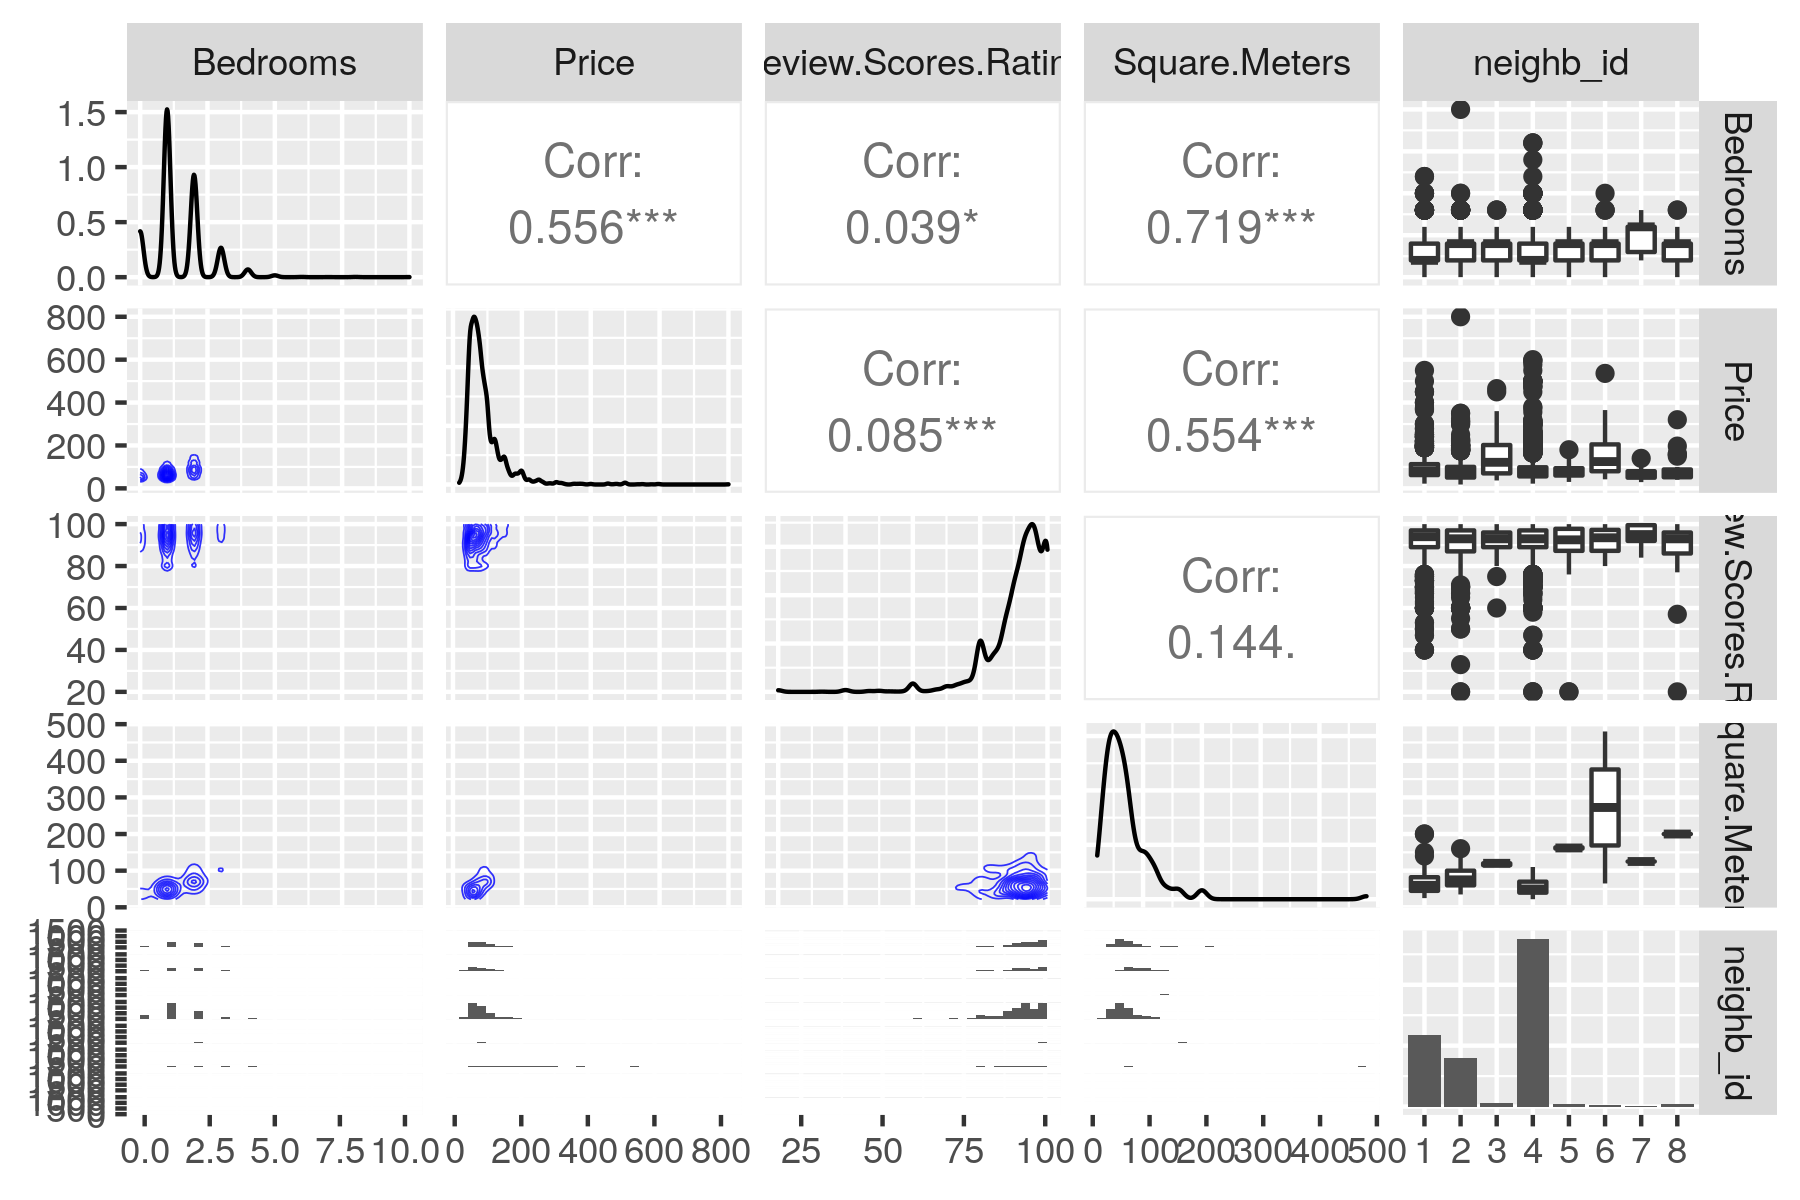

In [1397]:
library(GGally)

df_grafica <- df_madrid[,c(4,6,10,13,14)]

ggpairs(df_grafica, 
        lower = list(continuous = wrap("density", alpha = 0.8,size=0.2,color='blue'))
       #lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       )


In [1398]:
#Estos barrios se omitieron del modelo en una primera prueba indicando que tienen singularidades: Almagro, El Tréntaiseis, Lista, Moratalaz, Rios Rosas
#singularidades<-c('Almagro', 'El Tréntaiseis', 'Lista', 'Moratalaz', 'Rios Rosas')
#df_madrid %>%
#   filter(!(Neighbourhood %in% singularidades))-> df_madrid
#Neighbourhood+Accommodates+Bathrooms+Bedrooms+Beds+Price+Review.Scores.Rating
#Neigbourhood+Accommodates+Bathrooms+Bedrooms+Beds+Price+Guests.Included+Extra.People+Review.Scores.Rating+Latitude+Longitude+neighb_id

In [1399]:
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439,NA,1
2,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249,NA,4
3,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843,NA,1
4,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691,NA,4
5,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322,NA,4
6,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099,NA,4


In [1400]:
#Elimino columna Square.Feet porque con ella da un perfect fit
df_madrid <- df_madrid[,-c(7)]
df_madrid%>%
    filter(!(neighb_id==3 | neighb_id==7 | neighb_id==8))->df_madrid
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,Palacio,2,1,1,1,85,1,0,95,40.41697,-3.709439,NA,1
2,Malasaña,4,1,1,2,112,2,5,99,40.42319,-3.711249,NA,4
3,Palacio,8,3,3,4,190,6,40,96,40.41651,-3.717843,NA,1
4,La Latina,2,1,1,1,71,1,0,90,40.41200,-3.706691,NA,4
5,Embajadores,2,NA,1,NA,34,1,6,88,40.40809,-3.700322,NA,4
6,Embajadores,3,1,0,2,60,1,0,100,40.41085,-3.701099,NA,4


In [1401]:
library(MASS)
library(dplyr)
library(tibble)

set.seed(50)
idx<-sample(1:nrow(df_madrid),nrow(df_madrid)*0.7)
df_madrid.train<-df_madrid[idx,]
df_madrid.test <-df_madrid[-idx,]
model_df_madrid<-lm(formula=Square.Meters~Accommodates+Bathrooms+Bedrooms+Beds+Price+Review.Scores.Rating+neighb_id,data=df_madrid.train)
summary(model_df_madrid)


Call:
lm(formula = Square.Meters ~ Accommodates + Bathrooms + Bedrooms + 
    Beds + Price + Review.Scores.Rating + neighb_id, data = df_madrid.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.868 -12.560  -0.963   6.767  86.549 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -15.56204   22.95340  -0.678  0.49932    
Accommodates           2.81806    2.20125   1.280  0.20338    
Bathrooms              5.18008    5.32841   0.972  0.33327    
Bedrooms              16.88510    3.74714   4.506 1.76e-05 ***
Beds                  -0.98809    2.32663  -0.425  0.67196    
Price                  0.06294    0.03455   1.822  0.07145 .  
Review.Scores.Rating   0.44309    0.24212   1.830  0.07017 .  
neighb_id2             1.91200    6.16808   0.310  0.75721    
neighb_id4           -14.94409    4.63908  -3.221  0.00171 ** 
neighb_id5            48.89735   21.42696   2.282  0.02456 *  
neighb_id6            -2.24760   21.48605  -0.

In [1402]:
myrsquared<-function(Y,est_Y){
    Rsq <- 1-(sum((Y-est_Y)^2))/(sum((Y-mean(Y))^2))
    return(Rsq)
}
myrsquared

function(Y,est_Y){
    Rsq <- 1-(sum((Y-est_Y)^2))/(sum((Y-mean(Y))^2))
    return(Rsq)
}

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

[1] "MSE: NA"

[1] "R^2: NA"

RMSE  Rsquared       MAE 
       NA 0.7392423        NA

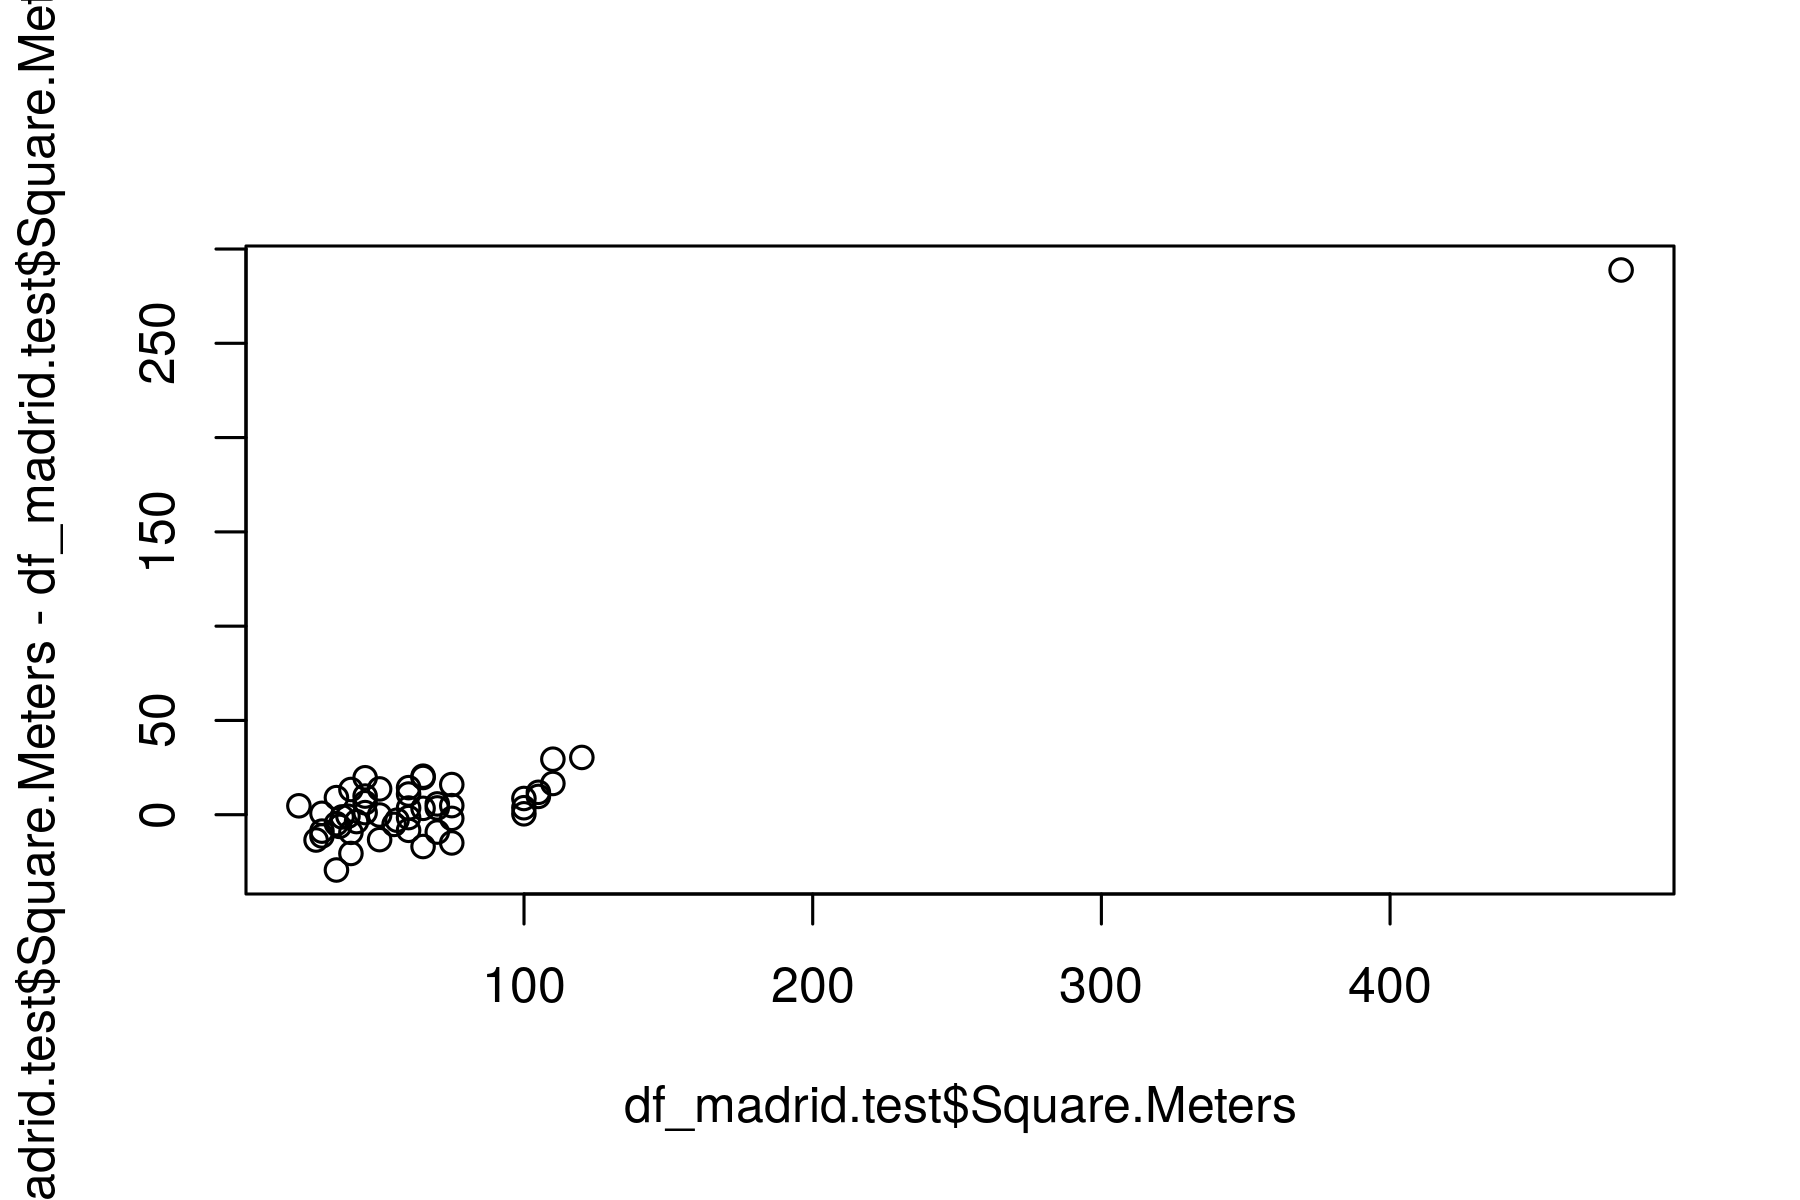

In [1403]:
library(caret)
df_madrid.test$Square.Meters_est<-predict(model_df_madrid,df_madrid.test)
#plot(df_madrid.train$Square.Meters,(df_madrid.train$Square.Meters-df_madrid.train$Square.Meters_est)^2)
plot(df_madrid.test$Square.Meters,(df_madrid.test$Square.Meters-df_madrid.test$Square.Meters_est))
paste("MSE:", sqrt(mean((df_madrid.test$Square.Meters-df_madrid.test$Square.Meters_est)^2)))
paste("R^2:", myrsquared(df_madrid.test$Square.Meters,df_madrid.test$Square.Meters_est))
caret::postResample(pred=df_madrid.test$Square.Meters_est, obs= df_madrid.test$Square.Meters)

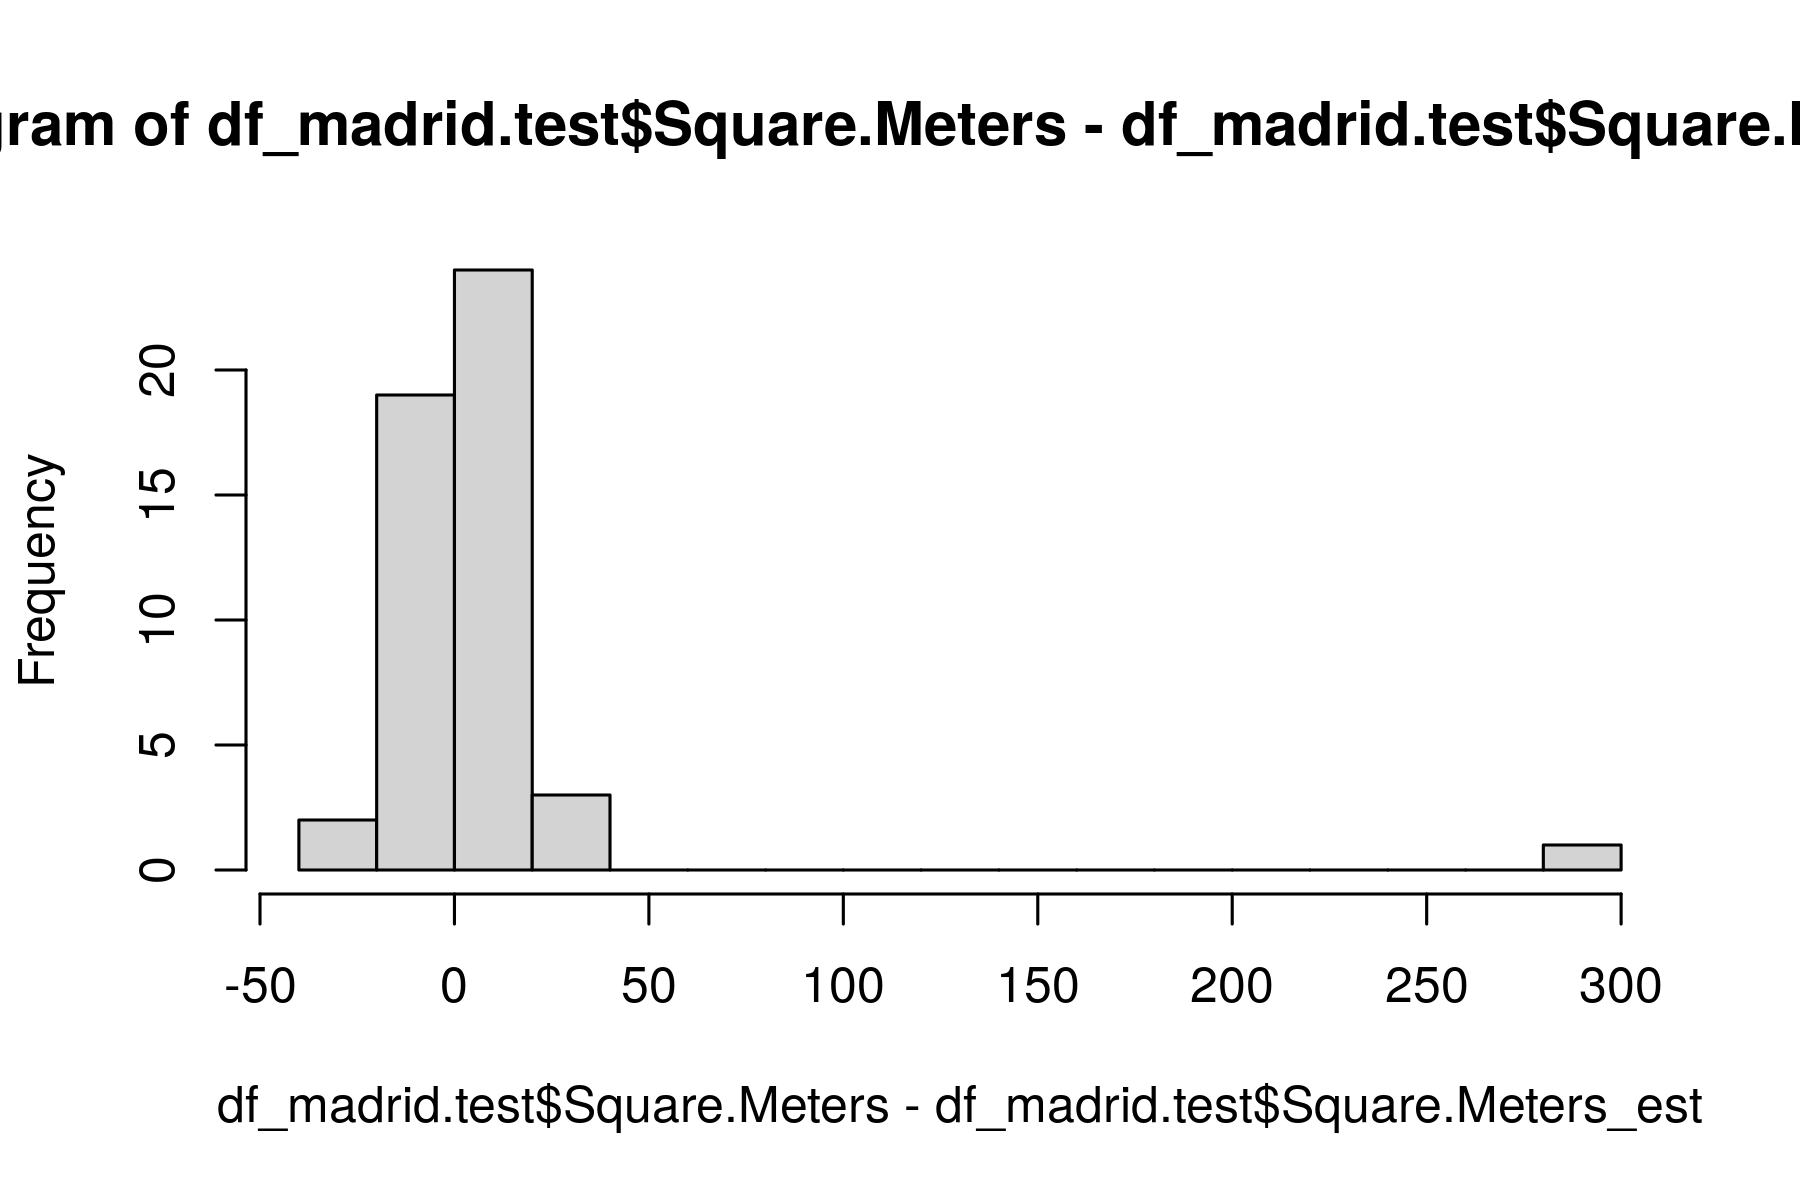

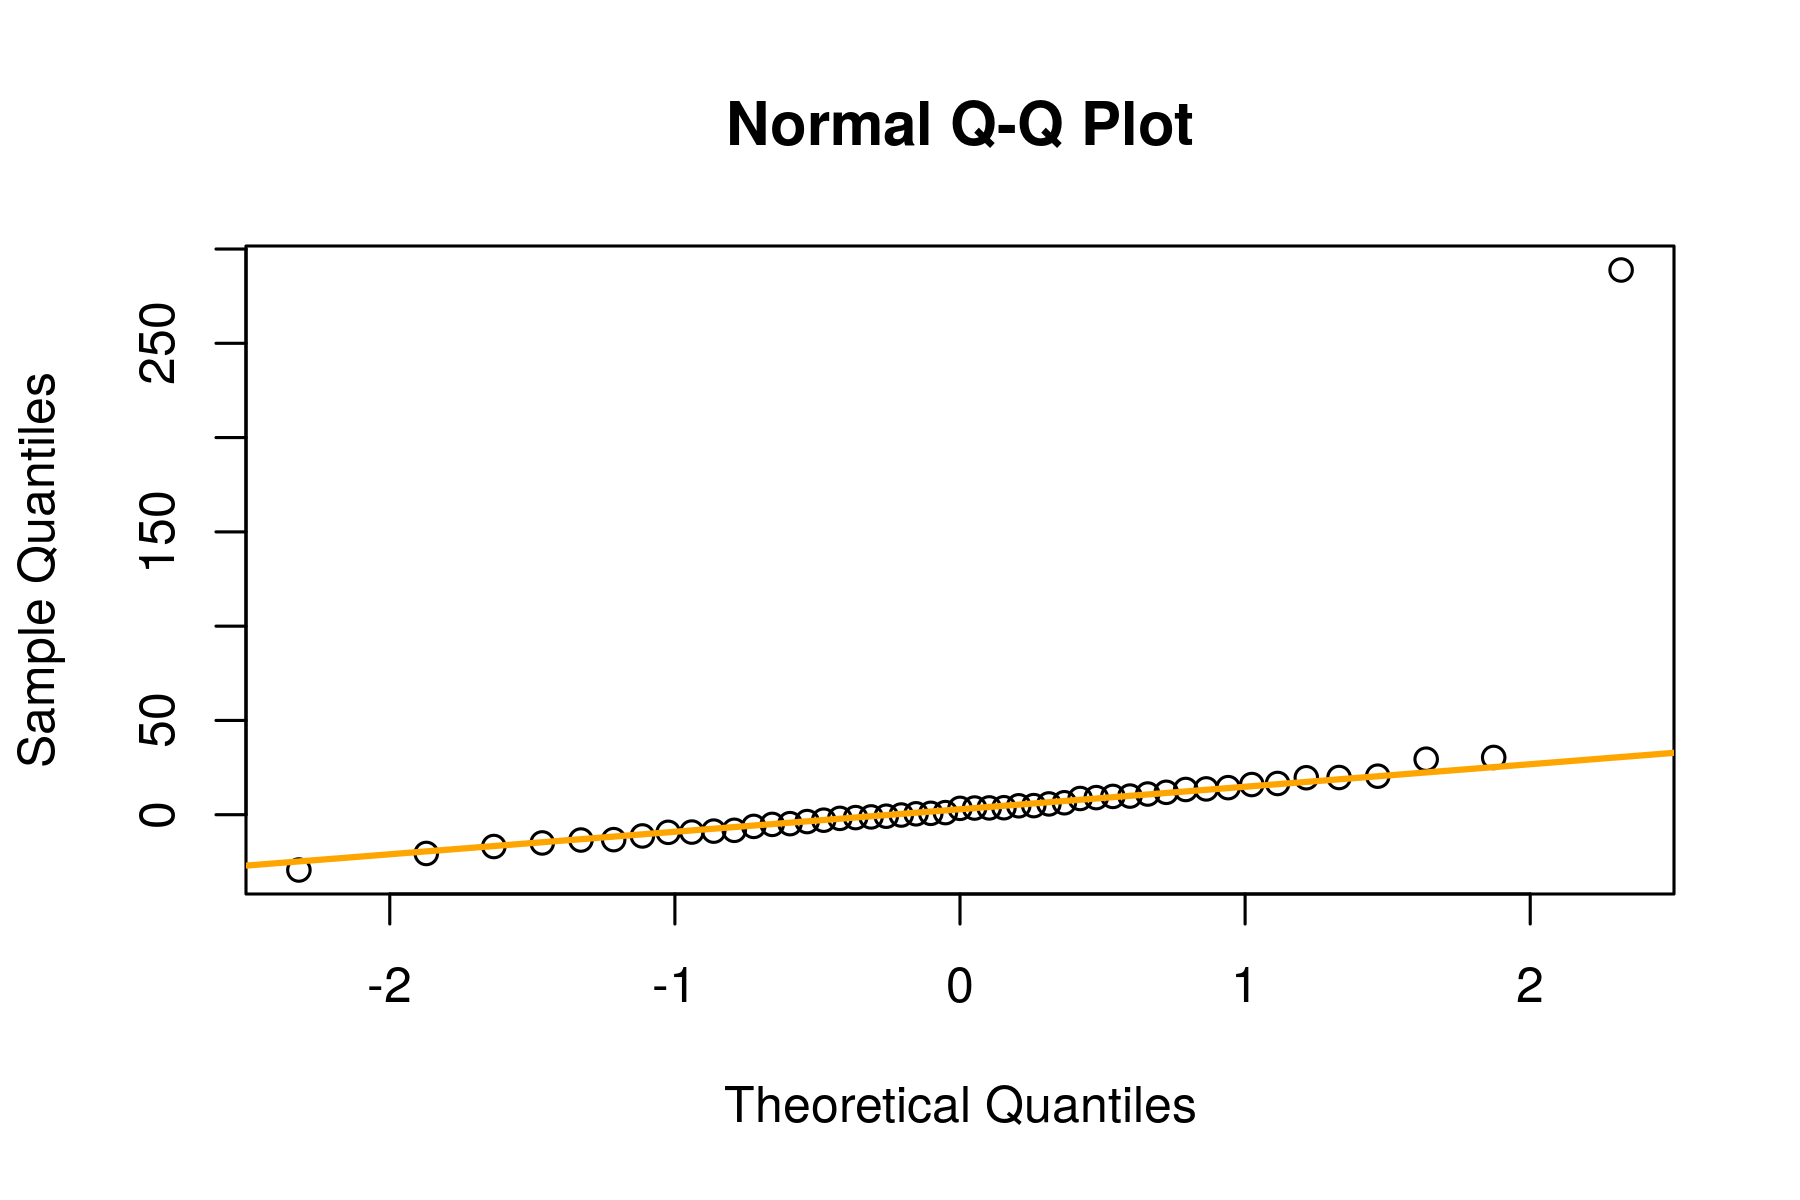

In [1404]:
hist(df_madrid.test$Square.Meters-df_madrid.test$Square.Meters_est,20)
qqnorm(df_madrid.test$Square.Meters-df_madrid.test$Square.Meters_est)
qqline(df_madrid.test$Square.Meters-df_madrid.test$Square.Meters_est, col = 'orange', lwd =2)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [1405]:
print("Predicción usando el método predict()")
predict(model_df_madrid,data.frame(Neighbourhood='Sol',Accommodates=6,Bathrooms=1,Bedrooms=3,Beds=3,Price=80,Guests.Included=6,Extra.People=1,Review.Scores.Rating=90,Latitude=40.42,Longitude=-3.702,neighb_id='4'))

[1] "Predicción usando el método predict()"


1 
84.18659

In [1406]:
print("Predicción usando el método predict()")
predict(model_df_madrid,data.frame(Neighbourhood='Sol',Accommodates=6,Bathrooms=1,Bedrooms=4,Beds=3,Price=80,Guests.Included=6,Extra.People=1,Review.Scores.Rating=90,Latitude=40.42,Longitude=-3.702,neighb_id='4'))

[1] "Predicción usando el método predict()"


1 
101.0717

In [1407]:
print("Predicción usando el método predict()")
predict(model_df_madrid,data.frame(Neighbourhood='Sol',Accommodates=6,Bathrooms=1,Bedrooms=5,Beds=3,Price=80,Guests.Included=6,Extra.People=1,Review.Scores.Rating=90,Latitude=40.42,Longitude=-3.702,neighb_id='4'))

[1] "Predicción usando el método predict()"


1 
117.9568

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [1408]:
df_madrid$New_Square.Meters=
    ifelse(is.na(df_madrid$Square.Meters), df_madrid$New_Square.Meters<-predict(model_df_madrid,df_madrid), df_madrid$New_Square.Meters<-df_madrid$Square.Meters)


In [1409]:
summary(df_madrid)

 Neighbourhood       Accommodates      Bathrooms        Bedrooms     
 Length:4798        Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Class :character   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 Mode  :character   Median : 4.000   Median :1.000   Median : 1.000  
                    Mean   : 4.087   Mean   :1.239   Mean   : 1.411  
                    3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
                    Max.   :16.000   Max.   :6.000   Max.   :10.000  
                                     NA's   :14      NA's   :7       
      Beds            Price        Guests.Included   Extra.People    
 Min.   : 1.000   Min.   : 18.00   Min.   : 1.000   Min.   :  0.000  
 1st Qu.: 1.000   1st Qu.: 59.00   1st Qu.: 1.000   1st Qu.:  0.000  
 Median : 2.000   Median : 75.00   Median : 2.000   Median : 10.000  
 Mean   : 2.361   Mean   : 89.89   Mean   : 1.956   Mean   :  9.064  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.000  
 Max.   :16.000   Ma

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [1410]:
df_madrid %>%
    filter(!is.na(New_Square.Meters))->df_madrid
summary(df_madrid)

df_madrid %>%
    filter(!is.na(Bathrooms)) %>%
    filter(!is.na(Bedrooms)) %>%
    filter(!is.na(Price)) %>%
    filter(!is.na(Review.Scores.Rating))->df_madrid

summary(df_madrid)

 Neighbourhood       Accommodates      Bathrooms        Bedrooms   
 Length:4122        Min.   : 1.000   Min.   :0.000   Min.   :0.00  
 Class :character   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.:1.00  
 Mode  :character   Median : 4.000   Median :1.000   Median :1.00  
                    Mean   : 4.124   Mean   :1.236   Mean   :1.41  
                    3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.:2.00  
                    Max.   :16.000   Max.   :6.000   Max.   :8.00  
                                     NA's   :2       NA's   :1     
      Beds           Price        Guests.Included   Extra.People    
 Min.   : 1.00   Min.   : 18.00   Min.   : 1.000   Min.   :  0.000  
 1st Qu.: 1.00   1st Qu.: 57.00   1st Qu.: 1.000   1st Qu.:  0.000  
 Median : 2.00   Median : 74.00   Median : 2.000   Median : 10.000  
 Mean   : 2.38   Mean   : 86.88   Mean   : 2.013   Mean   :  9.441  
 3rd Qu.: 3.00   3rd Qu.: 99.00   3rd Qu.: 2.000   3rd Qu.: 15.000  
 Max.   :16.00   Max.   :800.00   Max.   :

 Neighbourhood       Accommodates      Bathrooms        Bedrooms    
 Length:4115        Min.   : 1.000   Min.   :0.000   Min.   :0.000  
 Class :character   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.:1.000  
 Mode  :character   Median : 4.000   Median :1.000   Median :1.000  
                    Mean   : 4.122   Mean   :1.235   Mean   :1.409  
                    3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.:2.000  
                    Max.   :16.000   Max.   :6.000   Max.   :8.000  
                                                                    
      Beds           Price        Guests.Included   Extra.People    
 Min.   : 1.00   Min.   : 18.00   Min.   : 1.000   Min.   :  0.000  
 1st Qu.: 1.00   1st Qu.: 57.00   1st Qu.: 1.000   1st Qu.:  0.000  
 Median : 2.00   Median : 74.00   Median : 2.000   Median : 10.000  
 Mean   : 2.38   Mean   : 86.88   Mean   : 2.015   Mean   :  9.385  
 3rd Qu.: 3.00   3rd Qu.: 99.00   3rd Qu.: 2.000   3rd Qu.: 15.000  
 Max.   :16.00   Max.   :800.00   

In [1411]:
pr <- prcomp(df_madrid[c('Accommodates','Bathrooms','Bedrooms','Beds','Price','Guests.Included','Extra.People','Review.Scores.Rating','Latitude','Longitude','New_Square.Meters')],,center = TRUE, scale. = TRUE)

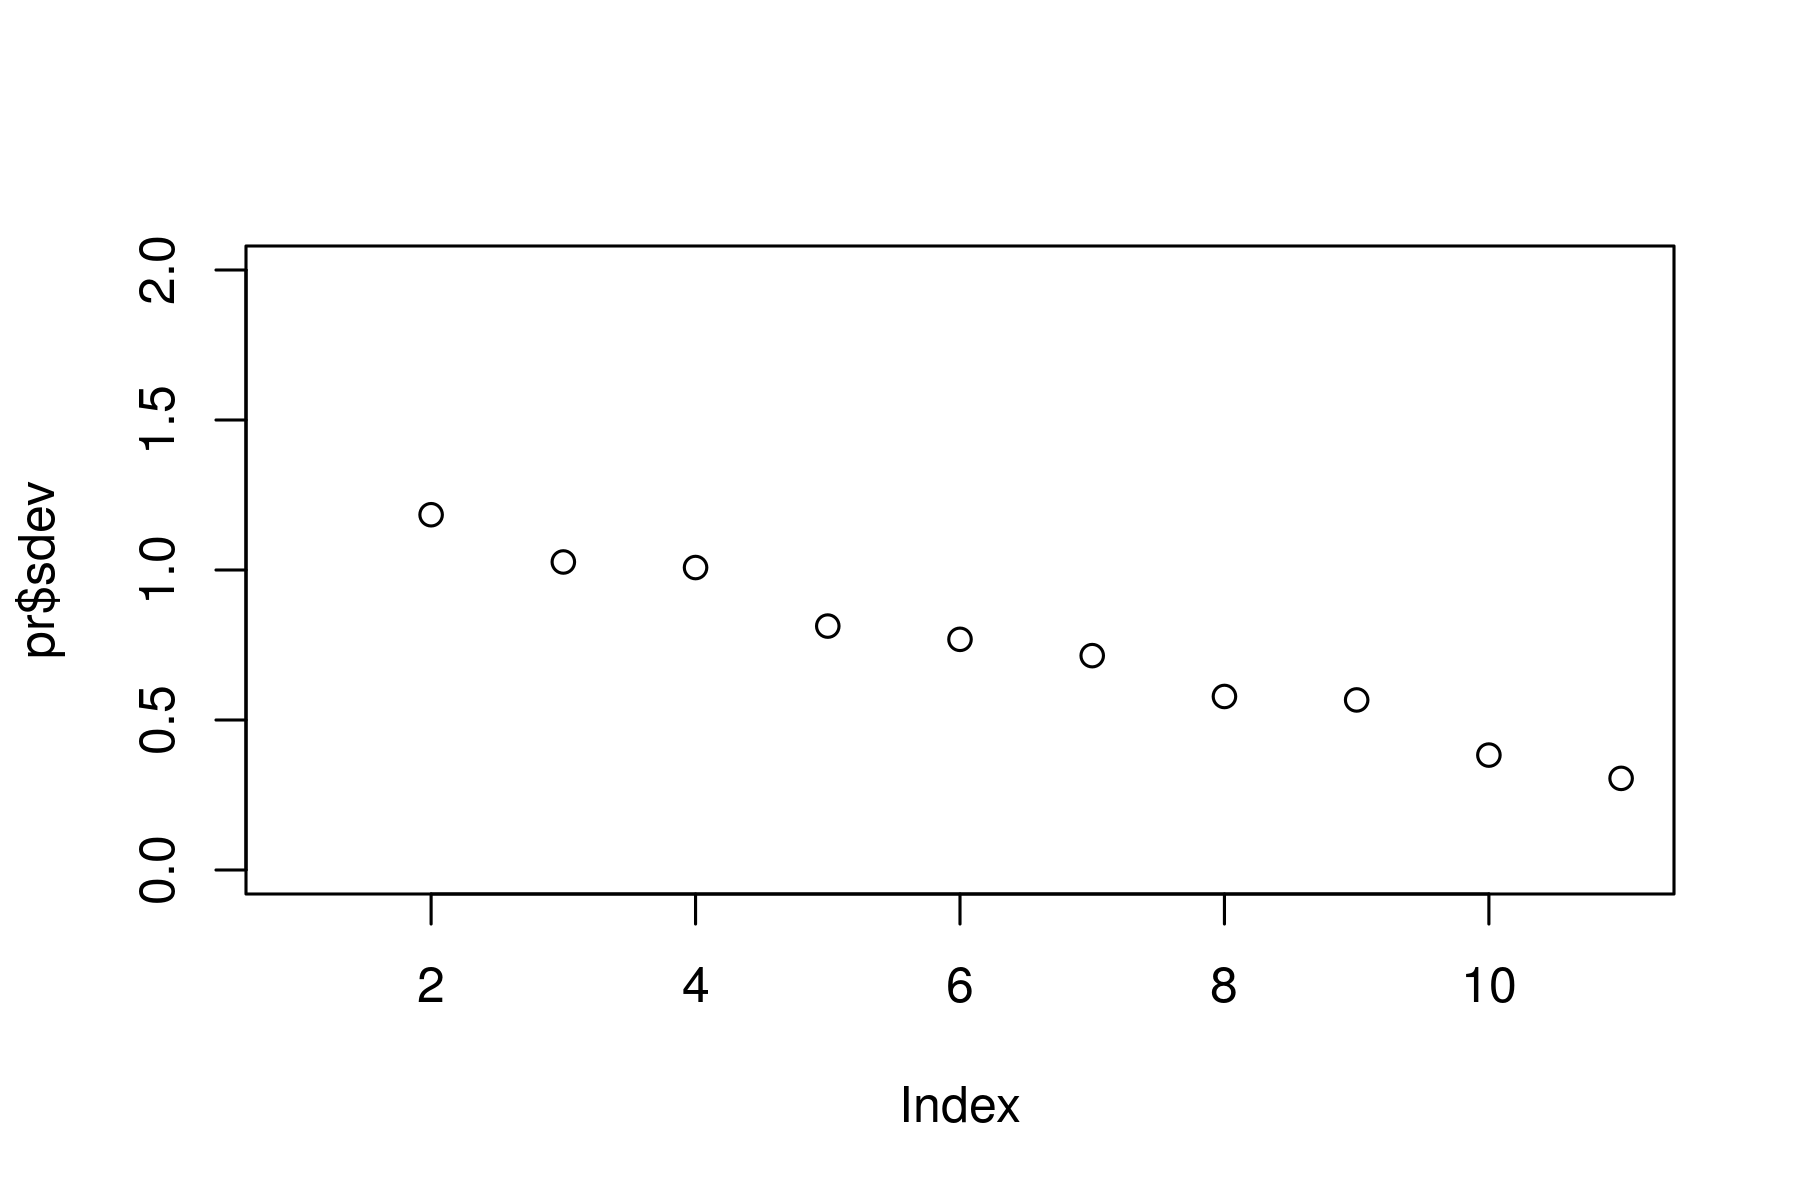

In [1412]:
plot(pr$sdev,ylim = c(0,2))

In [1413]:
number_of_pca_components<-7

Apc<-pr$x[,1:number_of_pca_components]

In [1414]:
piso_prueba<-data.frame(Accommodates=5,Bathrooms=2,Bedrooms=3,Beds=4,Price=80,Guests.Included=1,Extra.People=1,Review.Scores.Rating=80,Latitude=40.40809,Longitude=-3.700322,New_Square.Meters=100)

In [1444]:
piso_prueba_tr<-predict(pr,piso_prueba)
piso_prueba_tr<-piso_prueba_tr[,1:number_of_pca_components]

dist<-rep(NA,nrow(Apc))

for (i in 1:nrow(Apc)){
    dist[i]<-sum((piso_prueba_tr-Apc[i,])^2)
}
cinco_mas_similares<-head(order(dist),5)
cinco_mas_similares

[1] 2225 3134 1972  646 1535

In [1445]:
df_madrid[c(cinco_mas_similares),]
#nrow(cinco_mas_similares)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id,New_Square.Meters
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
2225,Embajadores,6,2.0,2,4,99,1,0,88,40.40913,-3.697280,NA,4,71.80314
3134,Palos do Moguer,6,1.0,2,4,130,1,0,87,40.40658,-3.692480,NA,1,83.07518
1972,Embajadores,6,1.5,3,4,115,2,10,77,40.41052,-3.695904,NA,4,82.23124
646,La Latina,6,2.0,2,3,59,1,0,85,40.40961,-3.704606,NA,4,68.94439
1535,Malasaña,6,2.0,3,5,120,1,0,80,40.42253,-3.706104,NA,4,85.47716


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?